
# <span style="color:rgb(213,80,0)">МЕТОДЫ ОПТИМИЗАЦИИ</span>

## Семинар 7
### Общая постановка задачи оптимизации.

В общем задачу оптимизации можно сформулировать так:


Найти такой вектор параметров $\vec{x}$ (переменных оптимизации), при котором расхождение между модельным представлением некоторого набора  выходных переменных (функций отклика, зависимых переменных) наилучшим образом описывает их состояния, наблюдаемые в эксперименте. Функции отклика в общем случае  зависят, как от вектора параметров, так и от вектора  некоторых независимых переменных (входных переменных/предикторов) $\vec{t}$


$${\vec{x} }^* =argmin(\Phi (\vec{t} ;\vec{x} ))$$

 ${\vec{x} }^*$  \- минимизатор


Функция  $\Phi$ \- так или иначе должна быть сведена к скалярной, она характеризует отклонение рассчитанного (предсказанного значения)  от измеренного. Иными словами:


Отклик = Модель(параметры, независимые переменные) +  ошибка (в том числе случайная)


 $\Phi$ \- мера ошибки, цель оптимизации \- минимизировать ошибку

### Линейная оптимизация (метод наименьших квадратов)

Линейная оптимизация \- это такая, для которой модель отклика зависит от параметров оптимизации линейно.


Если линейно, значит должна работать линейная алгебра!


***Решение систем линейных уравнений***


 $A\vec{x} =\vec{b}$ \- основная задача линейной алгебры, решение системы линейных алгебраических уравнений


Посмотрим на входящие в это уравнение вещи как на задачу оптимизации


 $\vec{b}$ \- вектор наблюдений (отклик, измеренный в эксперименте)


 $\vec{x}$ \- вектор параметров (переменных оптимизации)


 $A$ \- постоянная матрица (не зависящая от переменных оптимизации \-  $\vec{x}$ ), которая описывает нашу линейную модель

#### Системы линейных алгебраических уравнений

$$A\vec{x} =\vec{b}$$

Попробуем взять прямоугольную матрицу, но вначале нарисуем векторные пространства.


Подпространства матрицы (nxm)


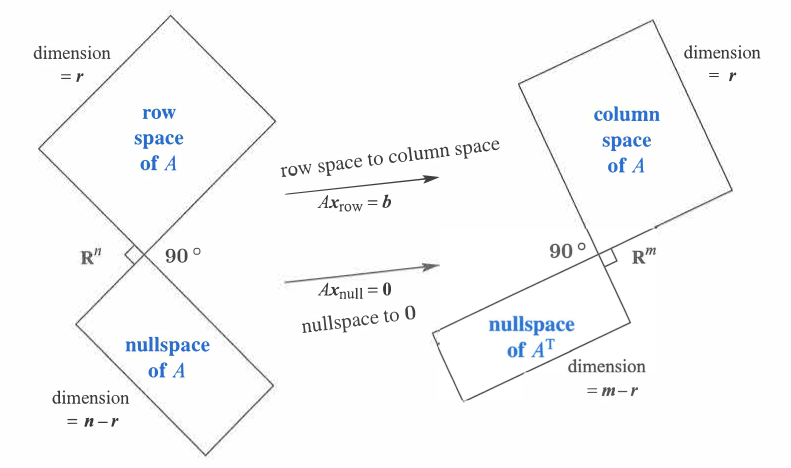


*Картинка из: \[Gilbert Strang \- Introduction to Linear Algebra (2016, Wellesley\-Cambridge Press) \]*


Матрица \- это четыре подпространства:


(1) Пространство строк (столбцов матрицы $A^T$ )  \- $C(A^T )$


(2) Пространство столбцов матрицы $A$ \- $C(A)$


(3) Нуль\-пространство строк (столбцов матрицы $A^T$ )   \- $N(A^T )$


(4) Нуль\- пространство столбцов матрицы (A) \- $N(A)$


 $N(A)\perp C(A^T )$ а $N(A^T )\perp C(A)$


Пространства (1) и (2) имеют одинаковую размерность (размерность  \- число линейно независимых компонент). Размерности нуль\-пространств не обязаны совпадать!


Если у нас есть вектор $\vec{x}$ из пространства строк $C(A^T )$ , то, когда мы на него действуем матрицей $A$ , она переводит его в вектор пространства столбцов $C(A)$ . Если же матрица  $A$ переводит вектор  $\vec{x}$ в нулевой вектор, то говорят, что $\vec{x}$ принадлежит нуль\-пространству матрицы $A$ $N(A)$ . Нуль\-пространство матрицы $A$ дополняет пространство строк до полного пространства размерности n (число строк в матрице). Аналогичная ситуация с матрицей $A^T$ , когда она действует на вектор $\vec{b}$ из пространства столбцов (2), то она переводит его в вектор пространства строк. , а если  $\vec{b}$ из нуль\-пространства матрицы $A^T$ , то она переводит его в нуль\-вектор. Поэтому пространства


 Для квадратной матрицы, у которой все столбцы (а, следовательно, и строки) линейно независимы, существует обратная матрица, которая <u>однозначно</u> переводит любой вектор пространства строк в соответствующий вектор пространства столбцов. Пространства (2) и (3) и (1) и (4) соотвественно попарно ортогональны (по сути это было сказано в двух предложения выше).


Обратная матрица:


In [1]:
clearvars
% квадратная матрица  - СЛАУ полностью определена
A = rand(10);
b = rand([10,1]);
x1 = inv(A)*b; %  x = (A^-1)*b, функция inv считает обратную матрицу
x2 = A\b; % это более быстрый вариант решения системы уравнений
norm(x1-x2)

ans = 1.0232e-15

In [2]:
% оба варианта дают одинаковый результат


Матрица квадратная (mxm), тут все однозначно, у квадратной матрицы есть обратная (если все ее столбцы линейно независимы). Обратная матрица \- это такая матрица, которая для любого вектора из пространства $R^m$ возвращает подпрострнаства строк.


Но на практике число параметров оптимизации обычно не равно числу экспериментальных точек,


оно  существенно меньше, поэтому матрица должна быть прямоугольной а не квадратной


In [3]:
clearvars
A = rand([100,5]);
b = rand([100,1]);
x1 = inv(A)*b

Error using inv
Matrix must be square.

In [4]:
x2 = A\b

x2 = 5x1    
    0.2194
    0.1925
    0.0779
    0.1012
    0.3458

In [5]:
clearvars
% квадратная матрица  - СЛАУ полностью определена
A = rand(10);
A(:,1) = A(:,2); % делаем матрицу сингулярной (матлаб решает задачу, но ругается)
b = rand([10,1]);
x1 = inv(A)*b ;

In [6]:
x2 = A\b;

In [7]:
norm(x1-x2)

ans = NaN


По ячейке выше возникает два вопроса:


1) Почему первое не сработало, а второе сработало, почему нельзя инвертировать прямоугольную матрицу $A^{n\times m}$ ?


2) Почему сработало второе?


Ответ на первый вопрос дает картинка пространств прямоугольной матрицы выше. Тут, кажется, проблема в том, что такая матрица (обратная к прямоугольной) не будет универсально работать для любого вектора $\vec{b}$ . Если вектор $\vec{b}$ принадлежит нуль\-пространству матрицы $A^T$ , то каков должен быть вектор $\vec{x}$ , чтобы  матрицей $A$ мы перевели его в нуль\-пространство матрицы $A^T$ ? Как мы могли вообще оказаться в этом нуль\-пространстве? Если матрица $A$ действует на $\vec{x}$ из пространства строк \- получаем вектор пространства столбцов, а если $\vec{x}$  из нуль\-пространства матрицы $A$ , получаем ноль\-вектор.


А чтобы ответить на второй вопрос можно посмотреть на алгоритм функции  **mldivide** aka **\\**  :


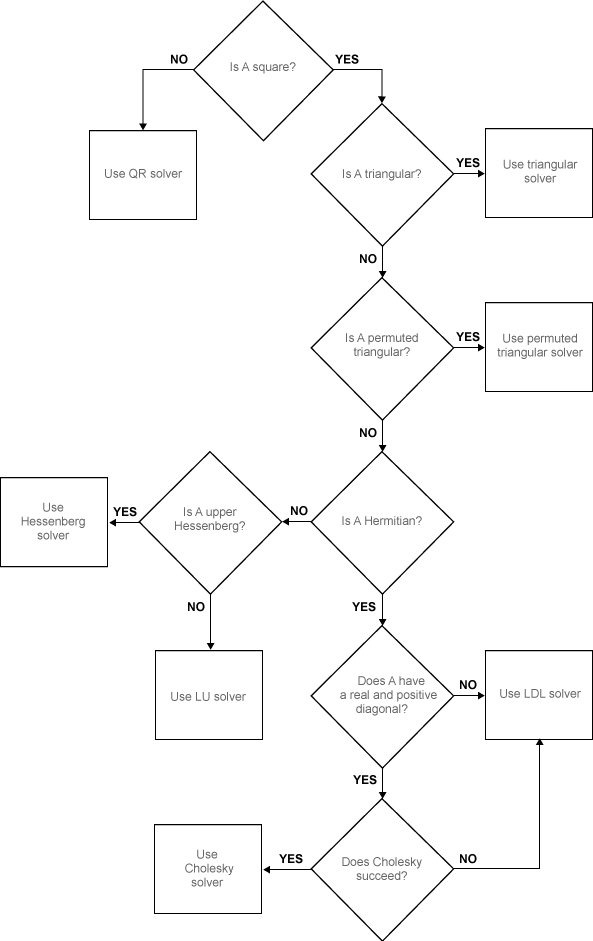



*Картинка алгоритма работы функции mldivide из help MATLAB*


Видно, что матлаб использует нескоторый таинственный QR солвер.


Если представить вектор $\vec{b}$ в виде суммы составляющих в пространстсве столбцов и в нуль пространстве матрицы $A^T$ (которое дополняет пространство столбцов до пространства $R^m$ )


$$A\vec{x} =\vec{b} =\vec{p} +\vec{e}$$

Картина с точки зрения линейной алгебры, если вектор $\vec{b}$ не лежит в пространстве столбцов матрицы $A$ , то его можно разделить на две составляющие:


 \-  нормальную пространству столбцов (то есть принадлежащая нульпространству $A^T$ )


 \- и лежащую в пространстве столбцов матрицы $A$


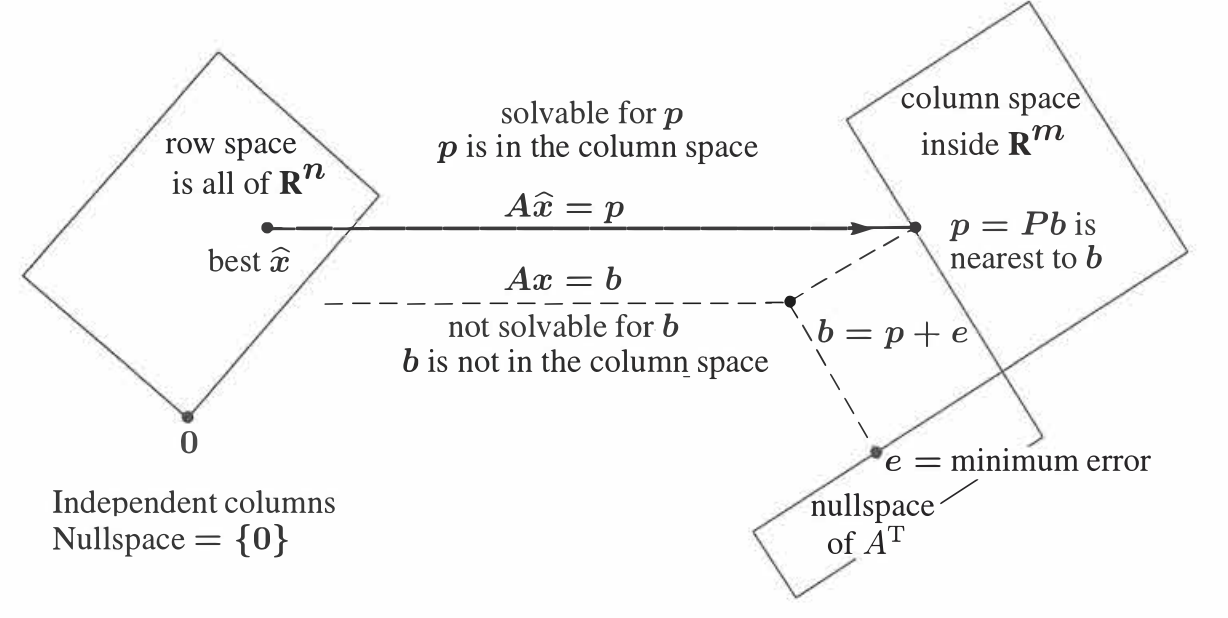


*\[Gilbert Strang \- Linear Algebra for Everyone (2020, Wellesley \- Cambridge Press)\]*


Идея в том, чтобы найти такой вектор $\vec{\hat{x} }$ , который при действии на него матрицей $A$ переходит в вектор $\vec{p}$ такой, что составляющая вектора $\vec{b}$ , лежащая  в нуль\-пространстве $A^T$ минимальна, то есть $\vec{e} =\vec{b} -\vec{p}$ минимальна


В принципе, в качестве скалярной  меры "минимальности"  можно взять модуль вектора, можно сумму модулей его координат, можно максимальное значение координаты и т.д.


Мы далее будем минимизировать квадрат модуля ошибки (то есть, решать задачу метода наименьших квадратов), у подобного выбора есть статистическое обоснование в виде принципа максимального правдоподобия, который мы рассмотрим в следующий раз.


Итак, минимизируемая функция (функция невязки в общих терминах задач оптимизации):


$$\Phi (\vec{x)={\vec{e} }^T \vec{e} =||A\vec{x} -\vec{b} ||^2 =(A\vec{x} -\vec{b} )^T (A\vec{x} -\vec{b} )={\vec{x} }^T A^T A\vec{x} -2({\vec{x} }^T A^T )\vec{b} +{\vec{b} }^T \vec{b} }$$

Видно, что функция невязки для задачи линейной оптимизации \- квадратична относительно переменных отимизации, почему она названа линейной?!


Условие минимума модуля ошибки $\vec{e}$ \- равенство нулю градиента  $\nabla_x ({\vec{e} }^T \vec{e} )=0$ , немного векторного анализа, и  это дает:


$$\nabla_x ({\vec{e} }^T \vec{e} )=2[\nabla ({\vec{x} }^T A^T )]^T A\vec{x} -2A^T \vec{b} =A^T A\vec{x} -A^T \vec{b} =0$$

||| Правило дифференцирования скалярного произведения:


||| $\nabla ({\vec{a} }^T \vec{b} )=(\nabla \vec{a} )^T \vec{b} +(\vec{a} )^T (\nabla \vec{b} )$ => $\nabla ({\vec{a} }^T \vec{a} )=2(\nabla \vec{a} )^T \vec{a}$


||| Правило дифференцирования матриц:


 ||| $\nabla (A\vec{x} )=A\nabla \vec{x}$ , а $\nabla ({\vec{x} }^T A)=A^T \nabla \vec{x}$ , $\nabla_x \vec{x} =I$


В итоге имеет уравнение:


 $A^T A\vec{x} =A^T \vec{b}$                                                                        (1)


Отсюда, минимизатор :


 ${\vec{x} }^* =(A^T A)^{-1} A^T \vec{b}$                                                                 (2)


 $A^{\dagger} =(A^T A)^{-1} A^T$ \- псевдо обратная матрица \- оператор, который переводит произвольный вектор $\vec{b}$ в вектор пространства строк матрицы $A$ , если вектор $\vec{b}$ принадлежал пространству столбцов матрицы $A$ ; и в ноль, если $\vec{b}$ принадлежал нуль\-пространству матрицы $A^T$

#### Геометрический смысл псевдообратной матрицы:

Псевдообратная матрица, действуя на вектор $\vec{b}$ , переводит его в вектор пространства строк ${\vec{x} }^*$ , такой, что действие на этот вектор матрицы $A$ переводит его в проекцию вектора $\vec{b}$ на пространство столбцов матрицы $A$ .


 $A{\vec{x} }^* =A(A^T A)^{-1} A^T \vec{b} =P_A \vec{b}$                                                (3)


 $P_A =A(A^T A)^{-1} A^T =AA^{\dagger}$ \-  оператор проецирования произвольного вектора на векторное пространство столбцов матрицы $A$ :


$$P_A \vec{b} =\vec{p}$$

In [8]:
% Проекция вектора на пространство столбцов матрицы из двух столбцов

clearvars
% генерим случаные вектора в трехмерном пространстве
a1 = (0.5 - rand(3,1));
a2 = (0.5 - rand(3,1));


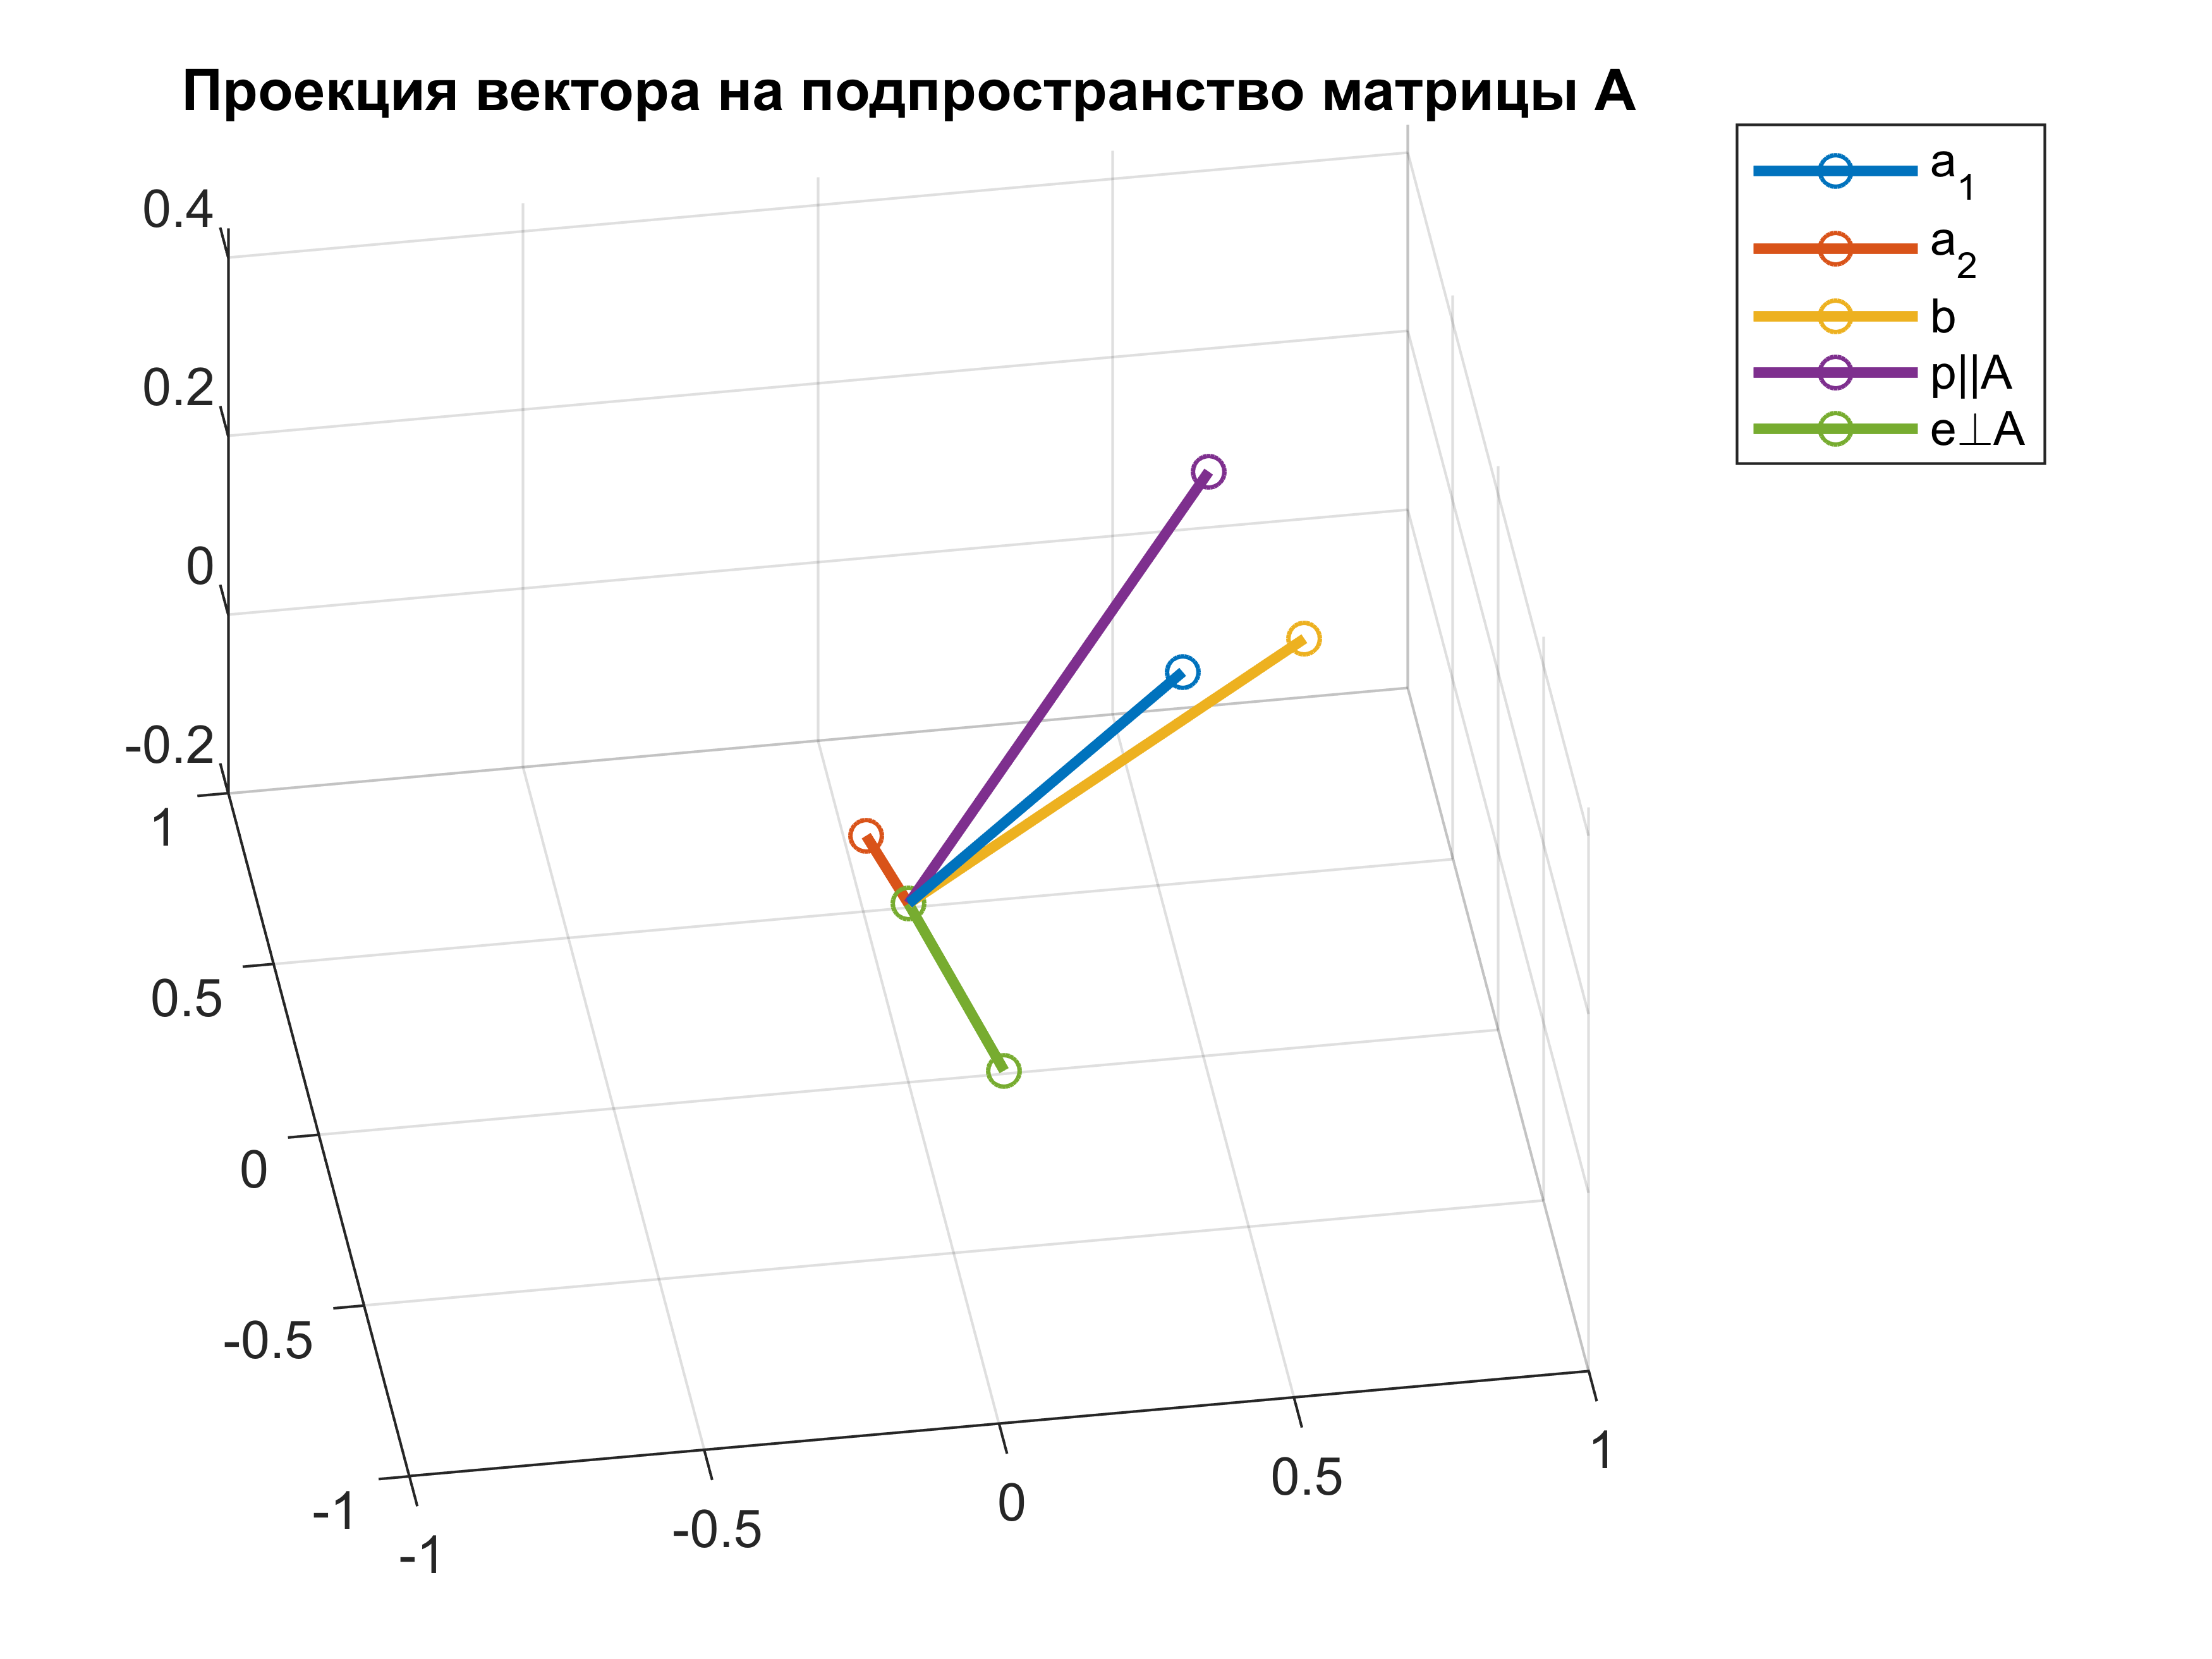

In [9]:
R = [0.72, 19.8,87.1 ];% модуль-тетта-фи - сферическая система координат дял трехмерного вектора
r = R(1);thetta = R(2);phi = R(3);
b = [r*cosd(thetta)*sind(phi);r*cosd(thetta)*cosd(phi);r*sind(thetta)] ;% некоторый вектор
A = [a1,a2];
PA = A*inv(A'*A)*A'; % матрица проецирования
p = PA*b ;% составляющая вектора в пространстве столбцов
e = b - p;  % составляющая вектора перпендикулярная пространству столбцов
draw_vector([],'Проекция вектора на подпространство матрицы A',...
["a_1" "a_2" "b" "p||A" "e\perpA"],"vector",a1,a2, b,p,e);


**Как считать псевдообратную матрицу?**


<u>Напрямую:</u>


 $A^{\dagger} =inv(A^T A)A^T$ \- используется метод разложения Гаусса (LU \- факторизация)


<u>При помощи QR факторизации:</u>


 $A=QR$ ( $R$ \- квадратная матрица, $Q$ \- ортогональная матрица)


QR\-факторизация дает: $A^{\dagger} =(R^T Q^T QR)^{-1} R^T Q^T =(R^T R)^{-1} R^T Q^T =R^{-1} Q^T$


<u>При помощи SVD разложения:</u>


 $A=U\Sigma V^T$  ( $A$ \- матрица размером nxm, $U,V$ \- ортонормированные матрицы размером (nxn) и (mxm) соотвественно ( $U^T U=I,V^T V=I$ ), $\Sigma$ \- матрица сингулярных значений размером (nxm))


SVD \- разложение дает: $A^{\dagger} =(A^T A)^{-1} A^T =(V\Sigma^T \Sigma V^T )^{-1} V\Sigma^T U=V(\Sigma^T \Sigma )^{-1} \Sigma^T U^T =V\Sigma^{\dagger} U^T$ , $\Sigma^{\dagger} =\begin{array}{ccc} 1/\sigma_1  & \ldots & 0\newline 0 & \ddots  & 0\newline 0 & \ldots & 1/\sigma_r  \end{array}$


В формуле выше, $r$ обозначает ранг матрицы $A$ , если матрица имеет m линейно независимых столбцов, то $r=m$


SVD можно использовать и для матриц, у которых столбцы являются линейно зависимыми, то есть ранг матрицы $r<m$ , тогда:


$$\Sigma^{\dagger} =\begin{array}{cccccc} 1/\sigma_1  & 0 &  &  & \ldots & 0\newline 0 & \ddots  &  &  & \ldots & 0\newline 0 & \ldots & 1/\sigma_r  & 0 & \ldots & 0\newline 0 & \ldots & \ldots & 0 & \ldots & 0\newline 0 &  &  &  & \ddots  & \newline 0 & \ldots & \ldots &  & \ldots & 0 \end{array}$$

То есть, матрица дополняется нулями до размера mxm


In [10]:
clearvars
A = rand(100,2);
b = rand(100,1);
[Q,R] = qr(A,"econ"); %econ значит, что возращается не полная матрица R и Q, а только размером с ранг данных
%[Q,R] = qr(A)
[u,S,v] = svd(A,"econ","vector");


Псевдообратная матрица $A^{\dagger}$ :


In [11]:
ApseudoDir = inv(A'*A)*A' % напрямую (самый медленный способ)

ApseudoDir = 2x100    
   -0.0084    0.0349    0.0477    0.0457    0.0464    0.0071    0.0158   -0.0202    0.0206    0.0274    0.0392   -0.0020   -0.0024   -0.0110   -0.0285    0.0273    0.0310    0.0119    0.0539    0.0439    0.0148    0.0221    0.0052    0.0106    0.0241    0.0106   -0.0085    0.0016    0.0209   -0.0009   -0.0290   -0.0018    0.0141    0.0023    0.0389    0.0225    0.0189    0.0145   -0.0234   -0.0036   -0.0281    0.0162    0.0168   -0.0061    0.0148   -0.0382   -0.0111    0.0282    0.0151    0.0198
    0.0123   -0.0140   -0.0284   -0.0224   -0.0201    0.0135   -0.0099    0.0335   -0.0057   -0.0118   -0.0203    0.0067    0.0342    0.0399    0.0486    0.0048   -0.0166    0.0036   -0.0329   -0.0319   -0.0001    0.0077    0.0175    0.0107   -0.0027    0.0021    0.0232    0.0247    0.0107    0.0202    0.0465    0.0232   -0.0061    0.0155   -0.0165   -0.0133   -0.0088   -0.0038    0.0399    0.0173    0.0441   -0.0031   -0.0119    0.0225   -0.0013    0.0600    0.0389   -0.

In [12]:
ApseudoQR = R\Q' % через QR - факторизацию

ApseudoQR = 2x100    
   -0.0084    0.0349    0.0477    0.0457    0.0464    0.0071    0.0158   -0.0202    0.0206    0.0274    0.0392   -0.0020   -0.0024   -0.0110   -0.0285    0.0273    0.0310    0.0119    0.0539    0.0439    0.0148    0.0221    0.0052    0.0106    0.0241    0.0106   -0.0085    0.0016    0.0209   -0.0009   -0.0290   -0.0018    0.0141    0.0023    0.0389    0.0225    0.0189    0.0145   -0.0234   -0.0036   -0.0281    0.0162    0.0168   -0.0061    0.0148   -0.0382   -0.0111    0.0282    0.0151    0.0198
    0.0123   -0.0140   -0.0284   -0.0224   -0.0201    0.0135   -0.0099    0.0335   -0.0057   -0.0118   -0.0203    0.0067    0.0342    0.0399    0.0486    0.0048   -0.0166    0.0036   -0.0329   -0.0319   -0.0001    0.0077    0.0175    0.0107   -0.0027    0.0021    0.0232    0.0247    0.0107    0.0202    0.0465    0.0232   -0.0061    0.0155   -0.0165   -0.0133   -0.0088   -0.0038    0.0399    0.0173    0.0441   -0.0031   -0.0119    0.0225   -0.0013    0.0600    0.0389   -0.0

In [13]:
ApseudoSVD = v*diag(1./S)*u' % через SVD - разложение

ApseudoSVD = 2x100    
   -0.0084    0.0349    0.0477    0.0457    0.0464    0.0071    0.0158   -0.0202    0.0206    0.0274    0.0392   -0.0020   -0.0024   -0.0110   -0.0285    0.0273    0.0310    0.0119    0.0539    0.0439    0.0148    0.0221    0.0052    0.0106    0.0241    0.0106   -0.0085    0.0016    0.0209   -0.0009   -0.0290   -0.0018    0.0141    0.0023    0.0389    0.0225    0.0189    0.0145   -0.0234   -0.0036   -0.0281    0.0162    0.0168   -0.0061    0.0148   -0.0382   -0.0111    0.0282    0.0151    0.0198
    0.0123   -0.0140   -0.0284   -0.0224   -0.0201    0.0135   -0.0099    0.0335   -0.0057   -0.0118   -0.0203    0.0067    0.0342    0.0399    0.0486    0.0048   -0.0166    0.0036   -0.0329   -0.0319   -0.0001    0.0077    0.0175    0.0107   -0.0027    0.0021    0.0232    0.0247    0.0107    0.0202    0.0465    0.0232   -0.0061    0.0155   -0.0165   -0.0133   -0.0088   -0.0038    0.0399    0.0173    0.0441   -0.0031   -0.0119    0.0225   -0.0013    0.0600    0.0389   -0.

In [14]:
bmldivide = A\b % по сути тоже через QR факторизацию

bmldivide = 2x1    
    0.4858
    0.4466

In [15]:
normApseudoDir = norm( A*ApseudoDir*b - b) % модуль ошибки (составляющей ортогональной пространству столбцов матрицы A)

normApseudoDir = 3.5676

In [16]:
normApseudoQR = norm( A*ApseudoQR*b - b)

normApseudoQR = 3.5676

In [17]:
normApseudoSVD = norm( A*ApseudoSVD*b - b)

normApseudoSVD = 3.5676

In [18]:
normmlDivide = norm(b - A*bmldivide)

normmlDivide = 3.5676


А что если матрица имеет зависимые столбцы?


In [19]:
clearvars
a = rand(5);
e = 1e-32;
A = [a,2*a+e];
b = rand(5,1);
[Q,R] = qr(A,"econ");
[u,S,v] = svd(A,"econ","vector");
ApseudoDir = inv(A'*A)*A'; % напрямую (самый медленный способ)

In [20]:
ApseudoQR = R\Q'; % через QR - факторизацию
ApseudoSVD = v*diag(1./S)*u'; % через SVD - разложение
bmldivide = A\b; % по сути тоже через QR факторизацию
normApseudoDir = norm( A*ApseudoDir*b - b)

normApseudoDir = 13.6368

In [21]:
normApseudoQR = norm( A*ApseudoQR*b - b)

normApseudoQR = 3.2192e-15

In [22]:
normApseudoSVD = norm( A*ApseudoSVD*b - b)

normApseudoSVD = 6.8270e-16

In [23]:
normmlDivide = norm(b - A*bmldivide)

normmlDivide = 2.8305e-15

#### Примеры линейной оптимизации когда столбцы матрицы $A$ линейно независимы
#### Полиномиальная аппркосимация и линейная оптимизация и линейная оптимизация линейно независимыми функциями произвольного базиса

Полиномиальный фиттинг  \- частный случай линейной оптимизации, для базиса полиномиальных функций столбцы матрица $A$ линейно независимы (насоклько это возможно).


Пусть $\vec{t} =\begin{array}{c} t_1 \newline \vdots \newline t_N  \end{array}$ \- вектор независиммых переменных, полиномиальная функция имеет вид:


$$\vec{y} (\vec{t} )=a_1 {\vec{t} }^0 +{\vec{t} }^1 +...+{\vec{t} }^{P-1} =[\begin{array}{ccccc} 1 & \ldots & t_1^{i-1}  & \ldots & t_1^{P-1} \newline \vdots  &  & \vdots  &  & \vdots \newline 1 & \ldots & t_j^{i-1}  & \ldots & t_j^{P-1} \newline \vdots  &  & \vdots  &  & \vdots \newline t_j^{i-1}  & \ldots & t_j^{P-1}  & \ldots & t_N^{P-1}  \end{array}][\begin{array}{c} a_1 \newline \vdots \newline a_i \newline \vdots \newline a_P  \end{array}]=V\vec{a}$$

 $V$ \- матрица Вандермонда \- матрица размером \[NxP\] (вместо $A$ ранее), $\vec{a}$ \- вектор параметров линейной оптимизации (вместо $\vec{x}$ ранее).


Если число измеренных точек (N) больше числа коэффициентов полинома, то, данная переопределенная система имеет решение в форме псевдообратной матрицы $\vec{a}$ .


В общем случае линейная оптимизация по некоторому базису может быть записана как:


$$\vec{y} (\vec{t} )=V\vec{a} =[\begin{array}{ccccc} \vec{\phi} (\vec{t} ,1), & \ldots & \vec{\phi} (\vec{t} ,i), & \ldots & \vec{\phi} (\vec{t} ,m) \end{array}]\vec{a}$$

 $\vec{\phi} (\vec{t} ,i)$ \- базисная функция, производит вектор\-столбец из вектора независимых переменных $\vec{t}$ и номера столбца


Например для стандартного полиномиального базиса:


$${\vec{\phi} }_{standard} (\vec{t} ,i)={\vec{t} }^{i-1}$$

А, например, для тригонометрического базиса:


$${\vec{\phi} }_{trig} (\vec{t} ,i)=\lbrace \begin{array}{cccc} cos(i\pi \vec{t} ) & для & четных & i\newline sin(i\pi \vec{t} ) & для & нечетных & i \end{array}$$

Модель экспериментальных данных



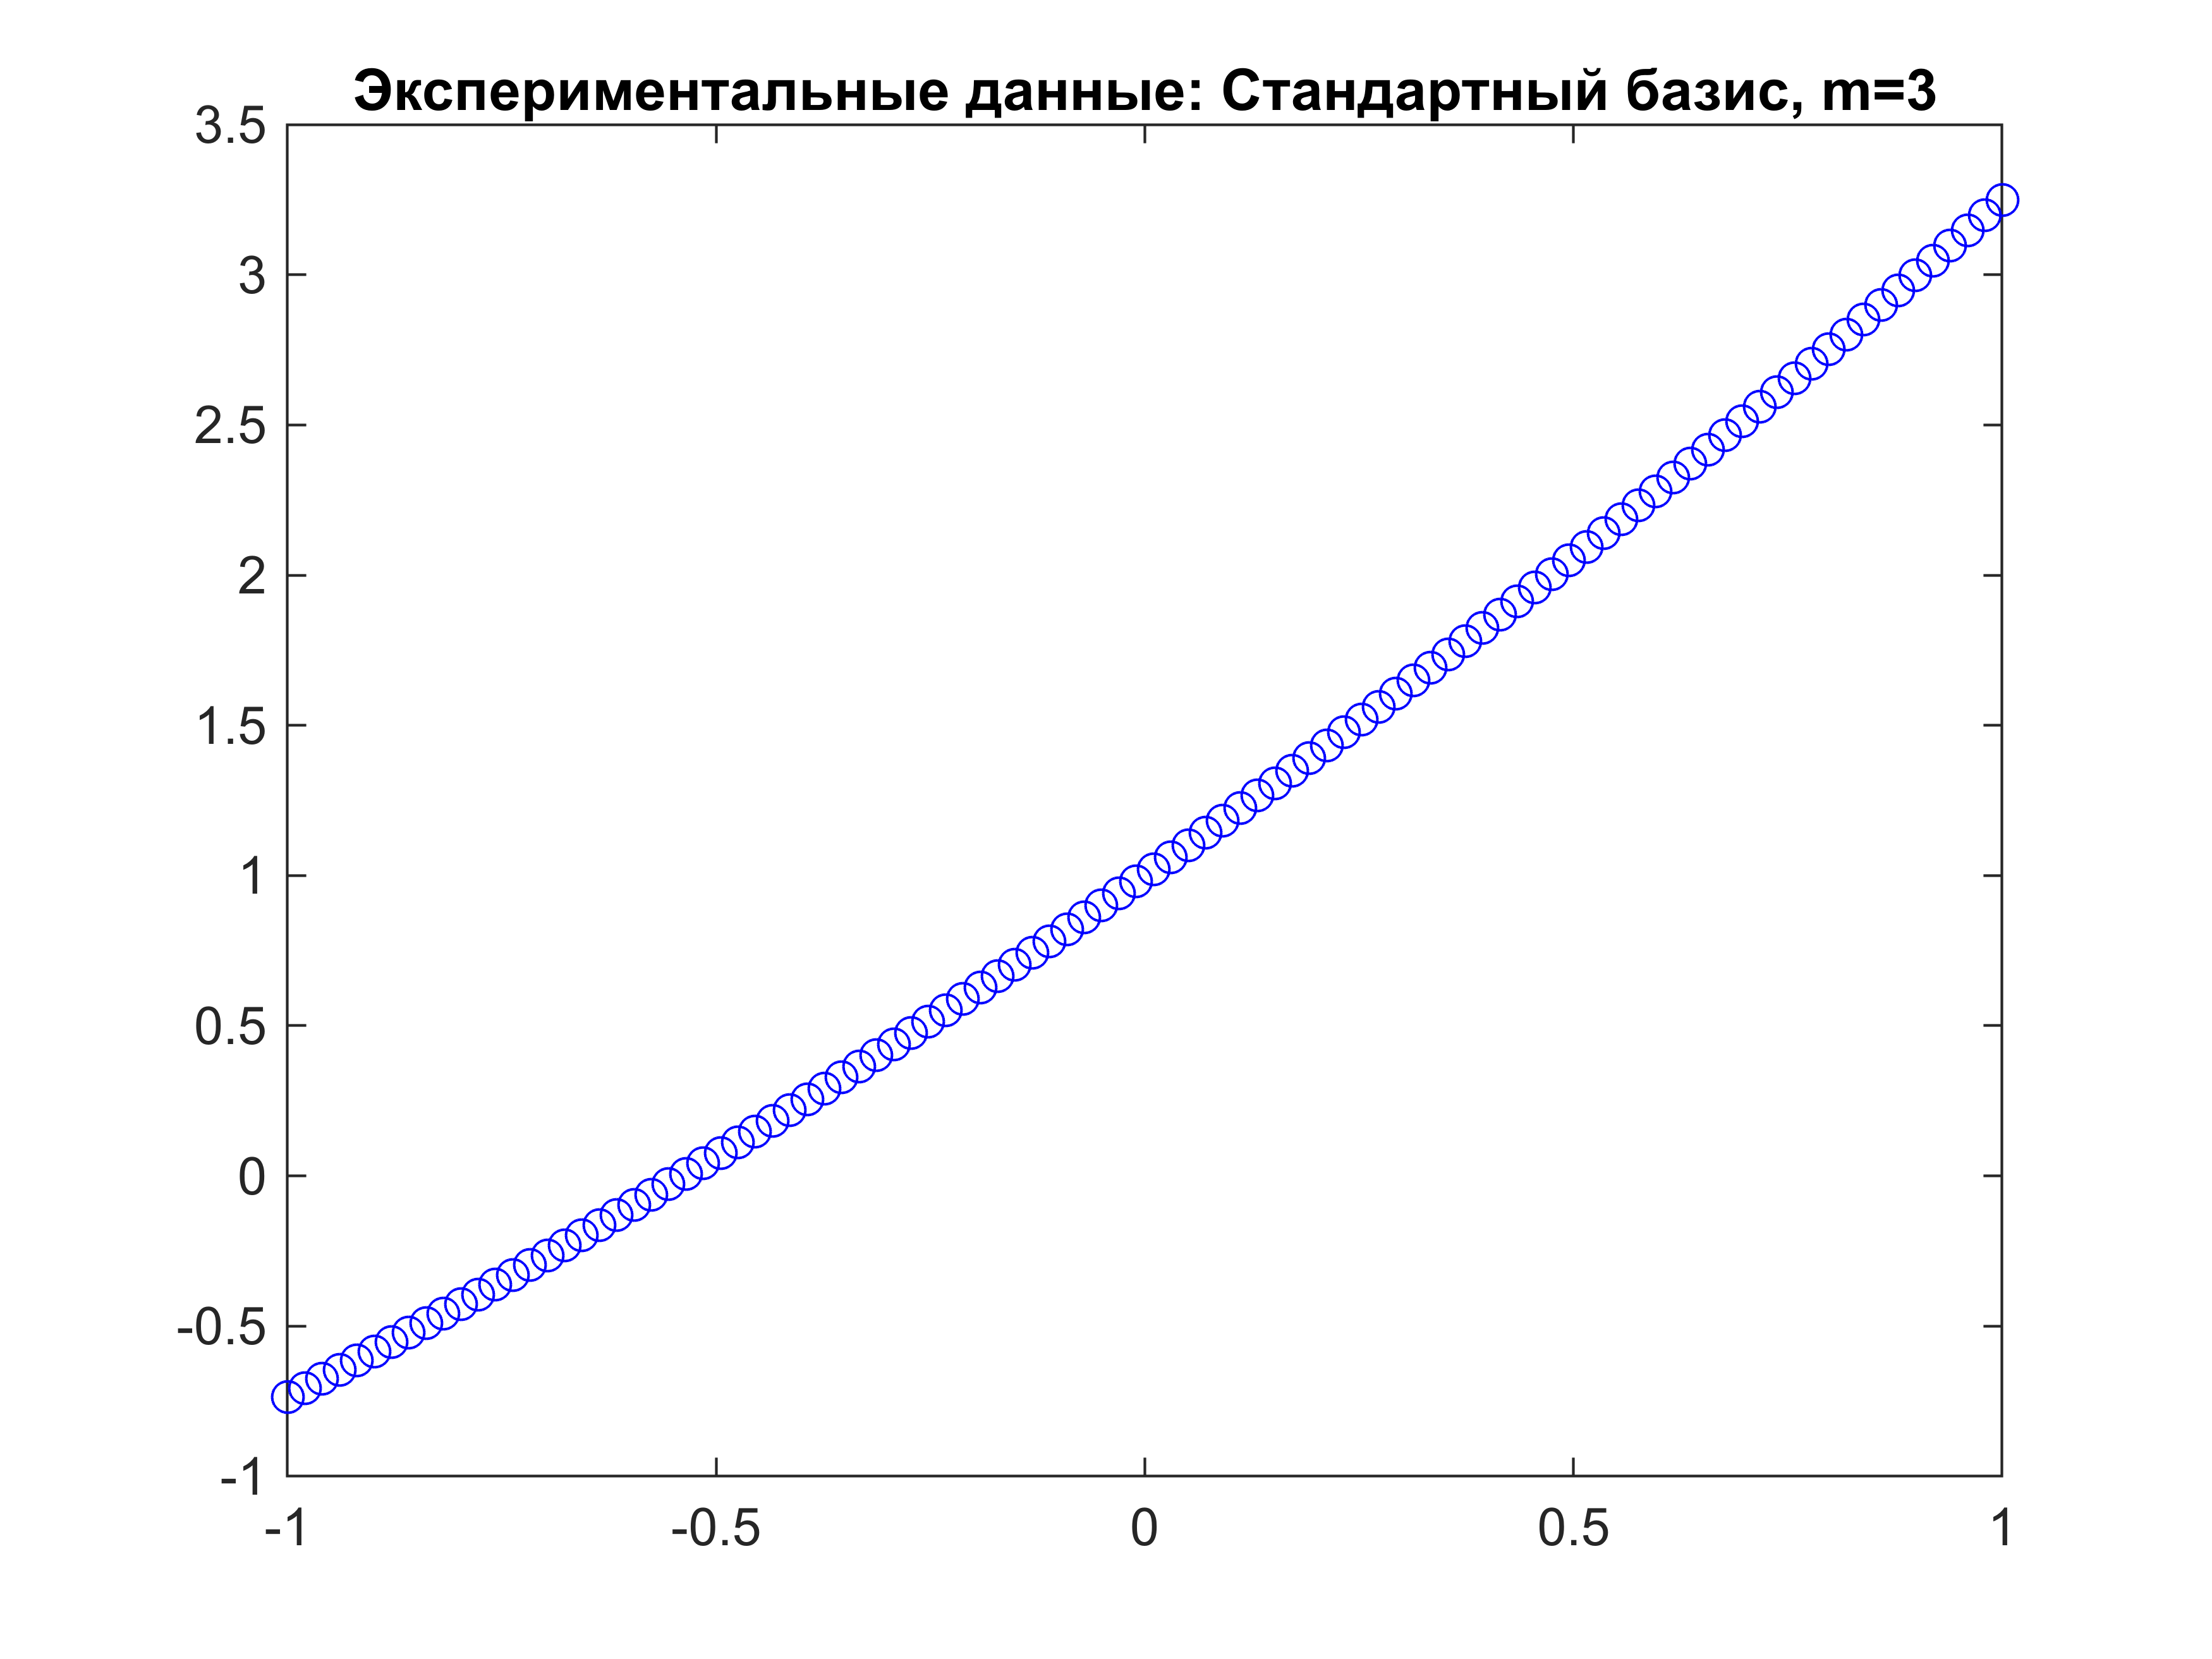

In [24]:
clearvars
% параметры экспериментальных данных
N=100; % число точек измерения
t = transpose(linspace(-1,1,N)); % независисмые переменные
type_experiment = "stand"; % тип реальнйо функции
P = 3; % степень полинома
a1=1;
a2=1.992;
a3=0.256;
a4=0.0218;
a5=-0.55829;
e = 0; % амплитуда шумов
a_real = [a1;a2;a3;a4;a5];
% заполняем массив "экспериментальных" данных
y = 0;
Pfun = producing_function(type_experiment,t);
for ii = 1:P
    y = y + a_real(ii)*Pfun(ii);
end
y = y + e*mean(y)*randn(size(y))/100;
ax = get_next_ax();
plot(ax,t,y,"ob");
title(ax,"Экспериментальные данные: "+ rus(type_experiment) + ", m=" + P)


Модель для фиттинга:


In [25]:
% параметры полинома которым фитим
type_fit = "stand"; % тип базиса для фитинга
Pfit = 3 ;% степень полинома для фитинга
V = vandermatrix(t,Pfit,type_fit); % формируем матрицу Вандермонда
tb = table();
tb.a_real = a_real(1:Pfit);
tb.a_fitted_qr = V\y; % решается методом qr факторизации

tb.a_fitted_pinv= pinv(V)*y;% решает путем SVD разложения матрицы
tb.a_lsqr = lsqminnorm(V,y) ; % минмизирует норму x (поэтому подходит для матриц А близких к сингулярным

a_polyfit = transpose(polyfit(t,y,Pfit-1)); % про polyfit дальше подробнее, но она решает задачу методом QR факторизации
tb.a_polyfit = a_polyfit(end:-1:1);
tb


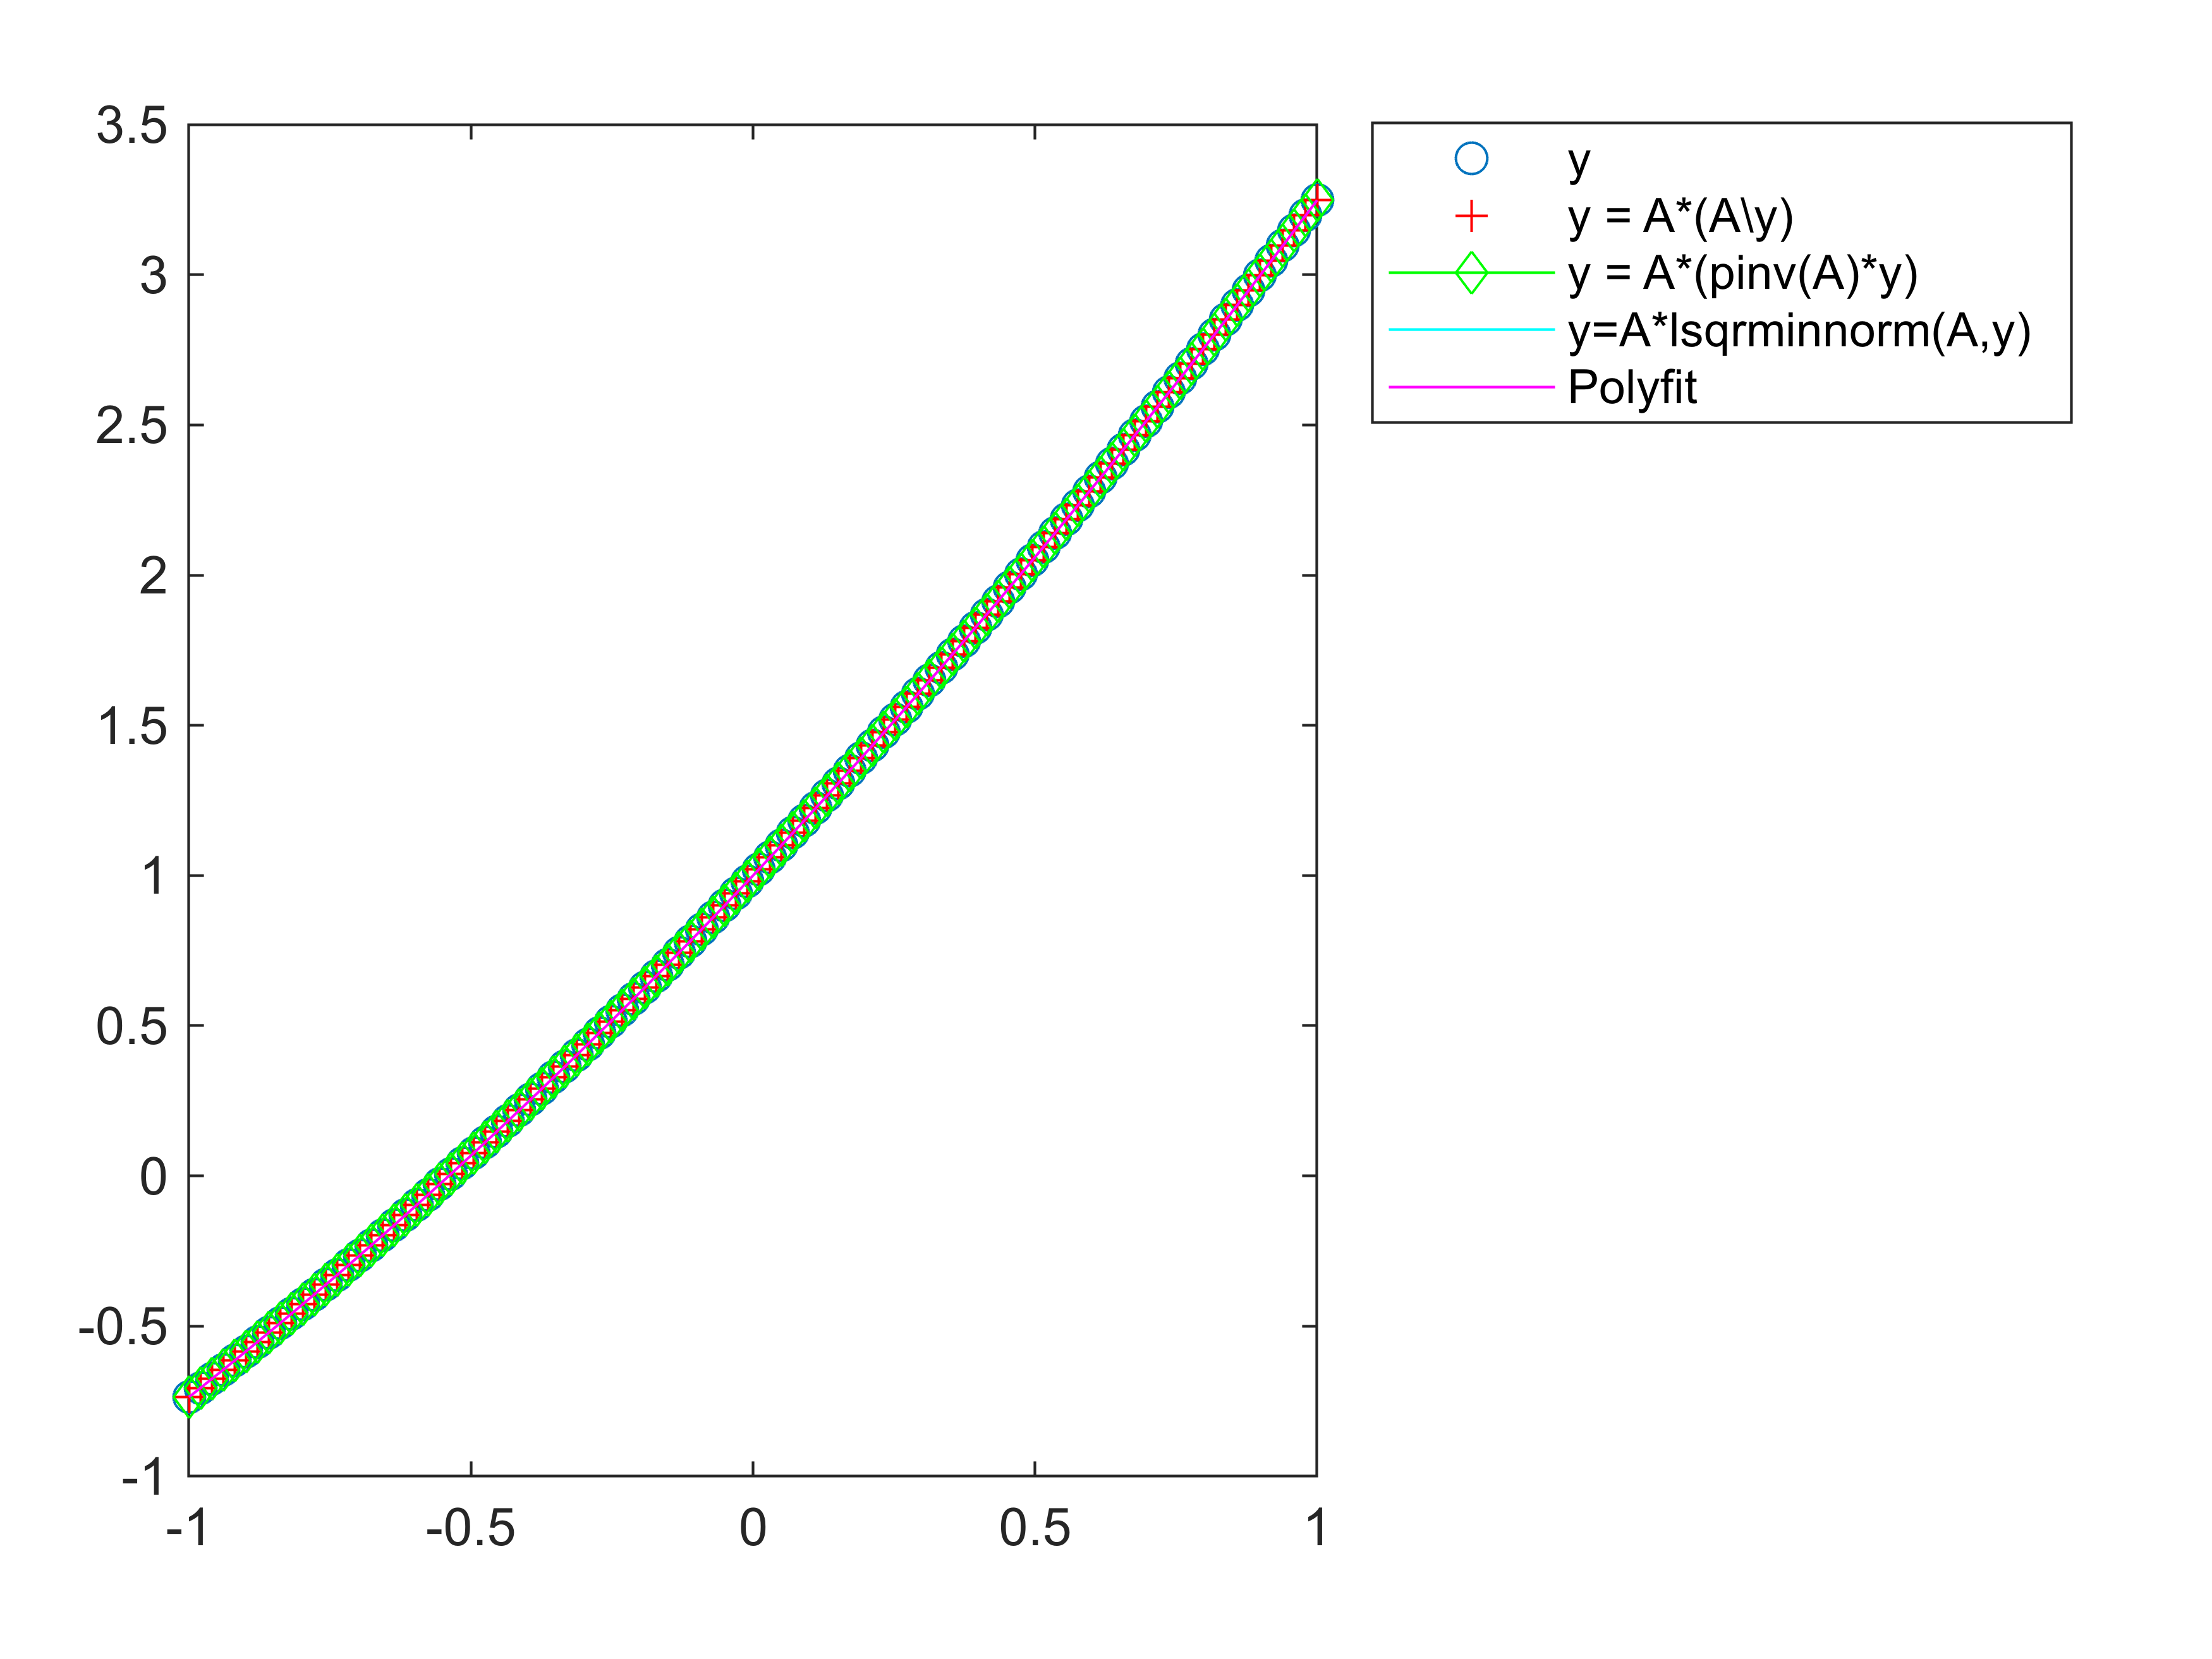

In [26]:
ax = get_named_ax("Сравнение различных способов решения задачи линейной оптимизации");
plot(ax,t,y,"o")
hold(ax,"on");
    plot(t,V*tb.a_fitted_qr,'+r')
    plot(t,V*tb.a_fitted_pinv,'g',"Marker","diamond")
    plot(t,V*tb.a_lsqr,'c')
    plot(t,polyval(a_polyfit,t),'m')
hold(ax,"off")
legend(ax,["y" "y = A*(A\\y)" "y = A*(pinv(A)*y)" "y=A*lsqrminnorm(A,y)" "Polyfit"],Location="bestoutside")


Сравнение скорости решения:


In [27]:
tm = table();
tm.t_fitted_qr = timeit(@()V\y,1); % решается методом qr факторизации
tm.t_fitted_pinv= timeit(@()pinv(V)*y,1); % решается через СВД разложение
tm.t_lsqr = timeit(@()lsqminnorm(V,y),1) ; % решается минимизацийе нормы стадартного отклонения итерационным способом
tm.t_polyfit = timeit(@()polyfit(t,y,Pfit-1),1);
tm

### Отличие полиномов Лежандра от стандартного базиса

Полиномы Лежандра \- ортогональны (в терминах функционального анализа)


$$\int_{-1}^{+1} P_n (x)P_m (x)dx=\lbrace \begin{array}{ccc} 1 & для & m=n\newline 0 & для & m\not= n \end{array}$$

Первые несколько полиномов:  \[Abramowitz and Stegun, "Handbook of Mathematical functions", Table 22.9.\]


P0(x) = 1


P1(x) = x


P2(x) = 3/2\*x.^2 \- 1/2


P3(x) = 5/2\*x.^3 \- 3/2\*x


P4(x) = 4.375\*x.^4 \- 3.75\*x.^2 + 3/8


P5(x) = 7.875\*x.^5 \- 8.75\*x.^3 + 1.875\*x


In [28]:
clearvars
% Проверим ортогоняльность полиномов Лежандра
P0 = @(x) ones(size(x))*sqrt(1/2);
P1 = @(x) x*sqrt(3/2);
P2 = @(x) (3/2*x.^2 - 1/2)*sqrt(5/2);
P3 = @(x) (5/2*x.^3 - 3/2*x)*sqrt(7/2);
P4 = @(x) (3/8 - 3.75*x.^2 + 4.375*x.^4)*sqrt(9/2);
P5 = @(x) (1.875*x - 8.75*x.^3 + 7.875*x.^5)*sqrt(11/2);
% численное интегрирование:
integral(@(x) P1(x).*P4(x),-1,1)

ans = 8.3267e-17


Отличие различных полиномиальных базисов с точки зрения линейной алгебры можно посмотреть по тому насколько матрица Вандермонда каждого из базисов близка к сингулярной


Для этого у нас есть SVD \- разложение



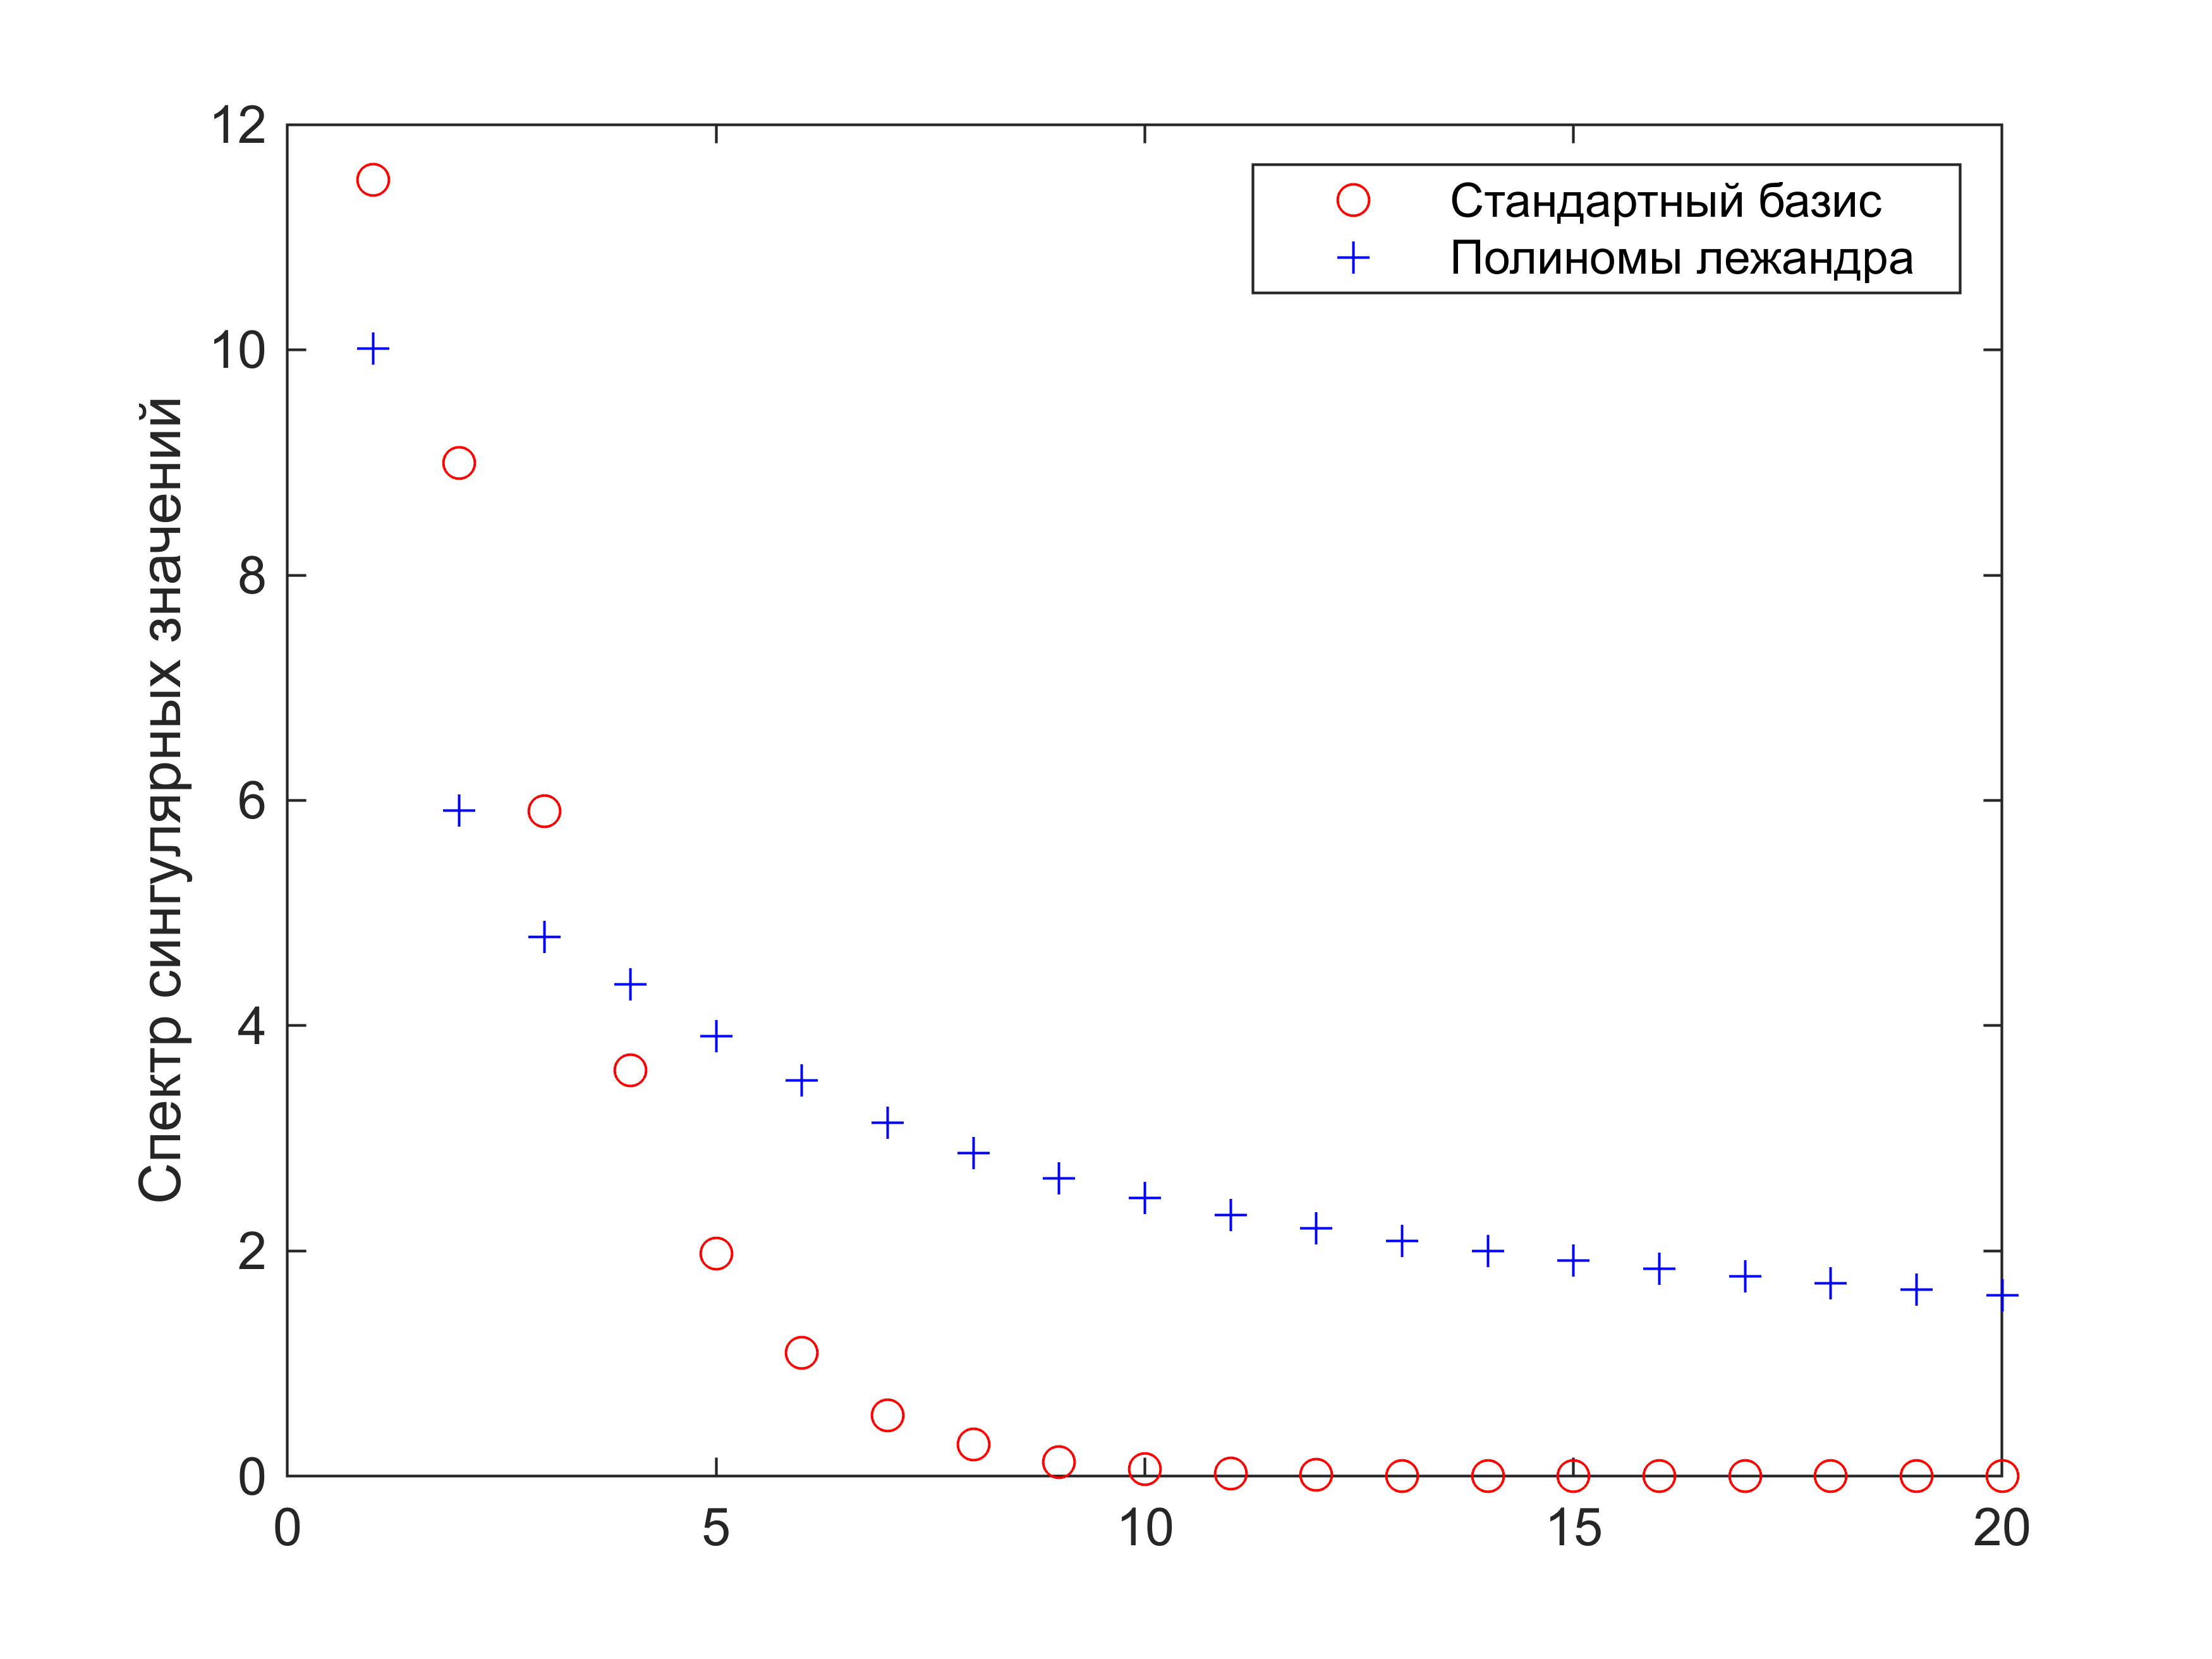

In [29]:
clearvars
N=100; % число точек измерения
t = transpose(linspace(-1,1,N)); % независисмые переменные
polynomial_degree = 20;
type1 = "stand" ; % тип реальнйо функции
type2 = "legP" ;% тип реальнйо функции
V_type1 = vandermatrix(t,polynomial_degree,type1); % формируем матрицу Вандермонда
V_type2 = vandermatrix(t,polynomial_degree,type2);

S_type1 = svds(V_type1,polynomial_degree); % хотим посмотреть SVD спектр матрицы Вандермонда
S_type2 = svds(V_type2,polynomial_degree);
N = 1:polynomial_degree;
ax = get_next_ax();
plot(ax,N,S_type1,"or",N,S_type2,"+b");legend(ax,[rus(type1), rus(type2)])
ylabel("Спектр сингулярных значений")

In [30]:
type1_rank = rank(V_type1)

type1_rank = 20

In [31]:
type2_rank = rank(V_type2) % значит все колонки независимы!

type2_rank = 20


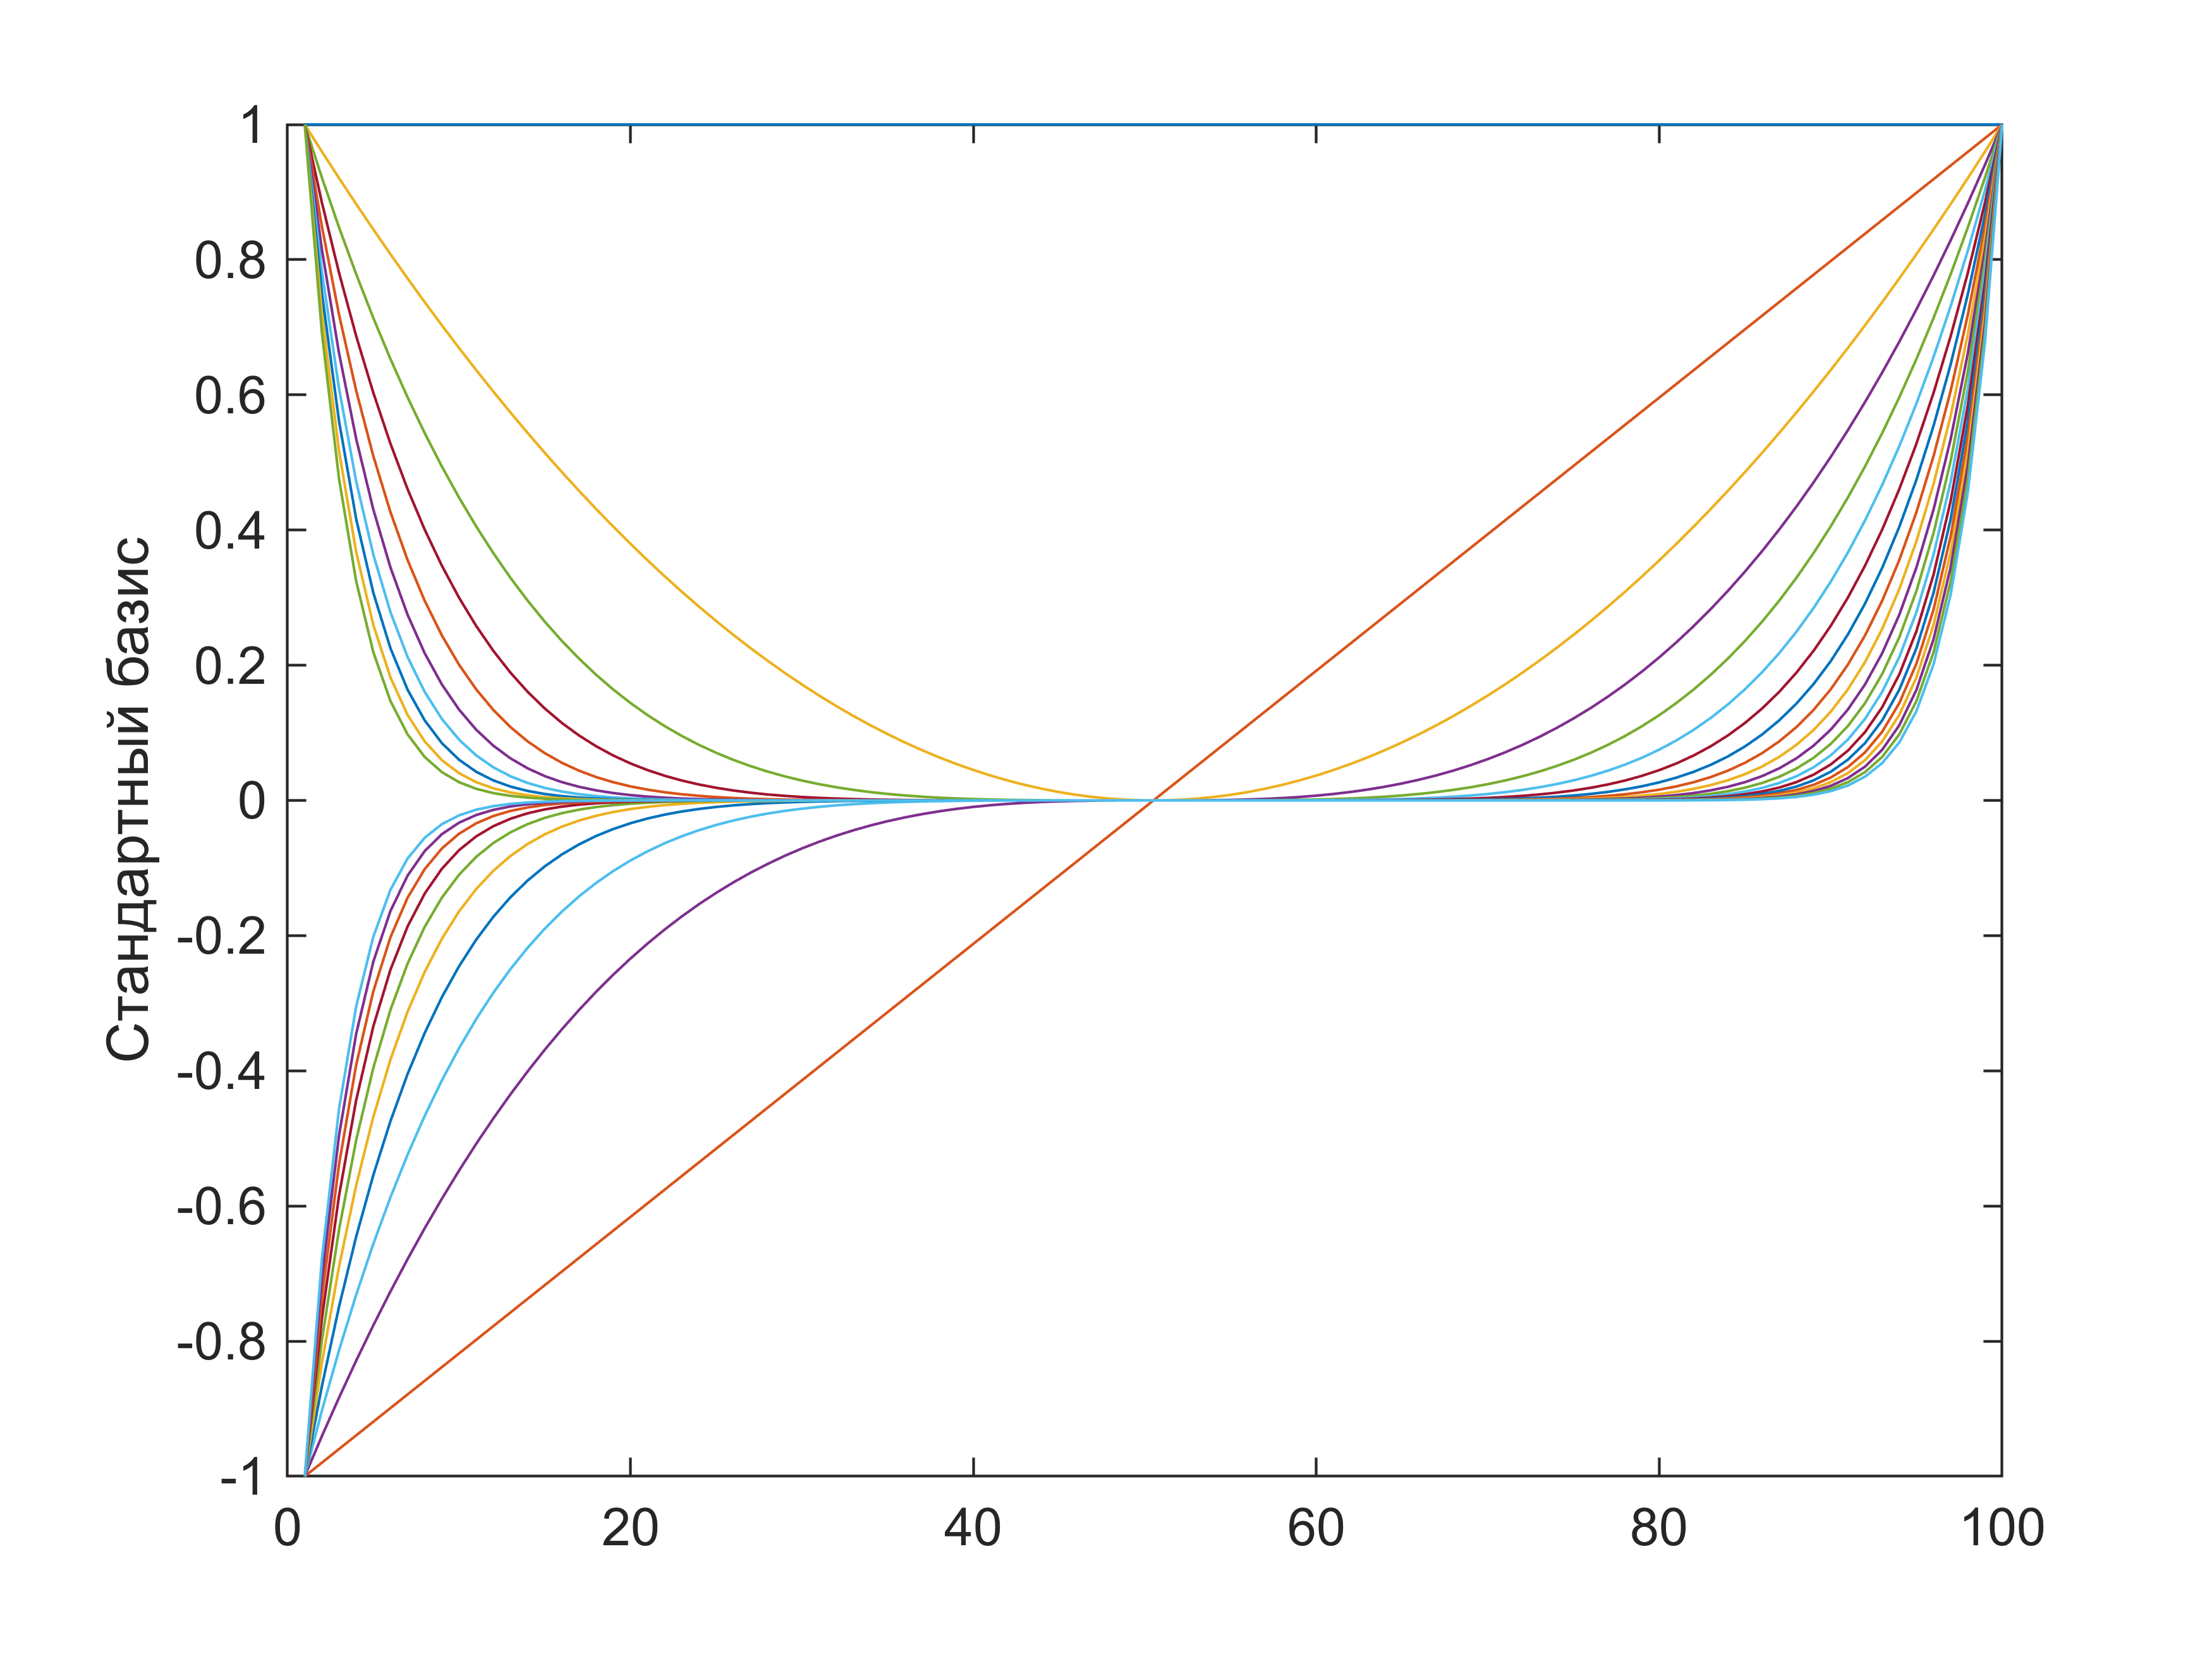

In [32]:
plot(get_named_ax(rus(type1)),V_type1); ylabel(rus(type1))


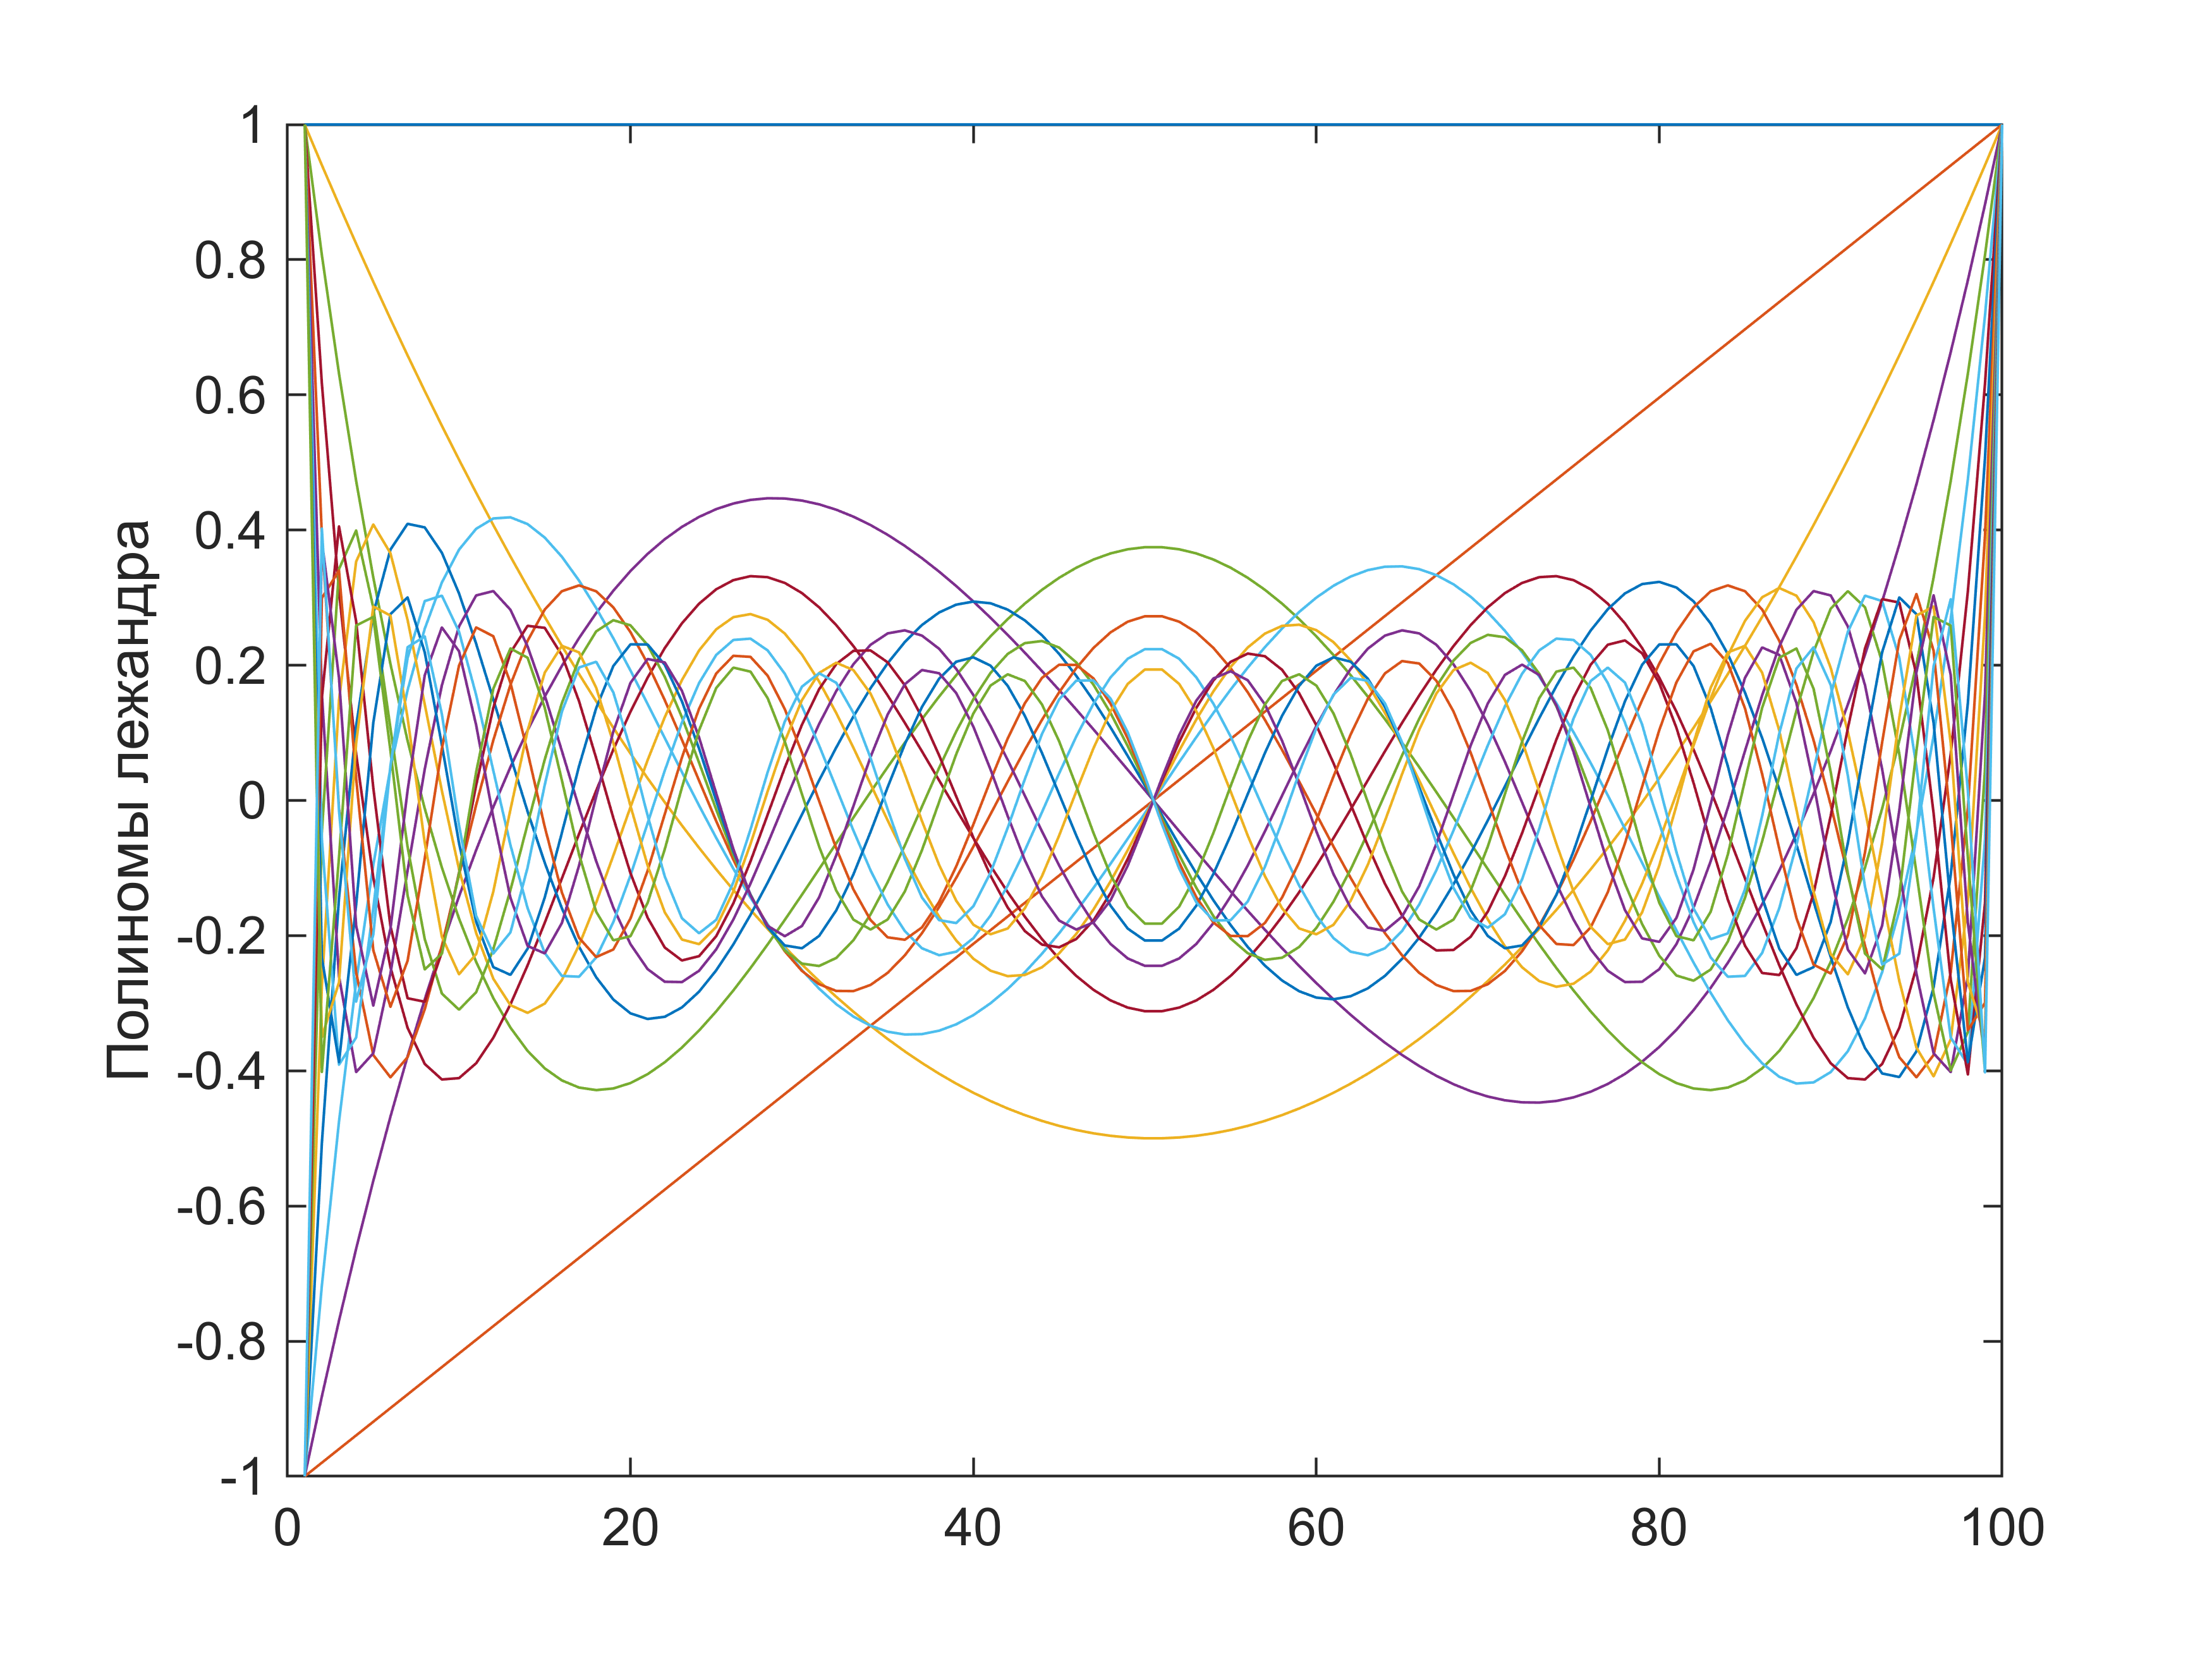

In [33]:
plot(get_named_ax(rus(type2)),V_type2);ylabel(rus(type2))


В общем, основной вывод тут, что стандартный базис достаточно быстро становится сингулярным

#### Оценка погрешности полиномиальной аппроксимации

Обычно полиномиальная аппроксимация может использоваться для следующих вещей:


1. Получить вектор параметров  (например, может быть нужна полка для линейной аппроксимации, скорость линейного роста чего\-то от времени или ускорение). При этом важно знать не только сам вектор параметров, но и вариацию коэффициентов для каждой из координат этого вектора


2. Полиномиальная аппркосимация может быть использована для получения некоторой гладкой кривой, которая затем используется для получения значений в некоторых заданных точках. При этом важны не только сами значения в этих точках, но и погрешность. Это что\-то вроде задачи интерполяции, но интерполяция \- это точная кусочная аппросимация, поэтому из нее невозможно получить оценку погрешности. Для примера рисунок ниже \- данные по температурной зависимости теплопроводности, поулчаемые с установки квазистационарного теплового режима:

<p style="text-align:left">
   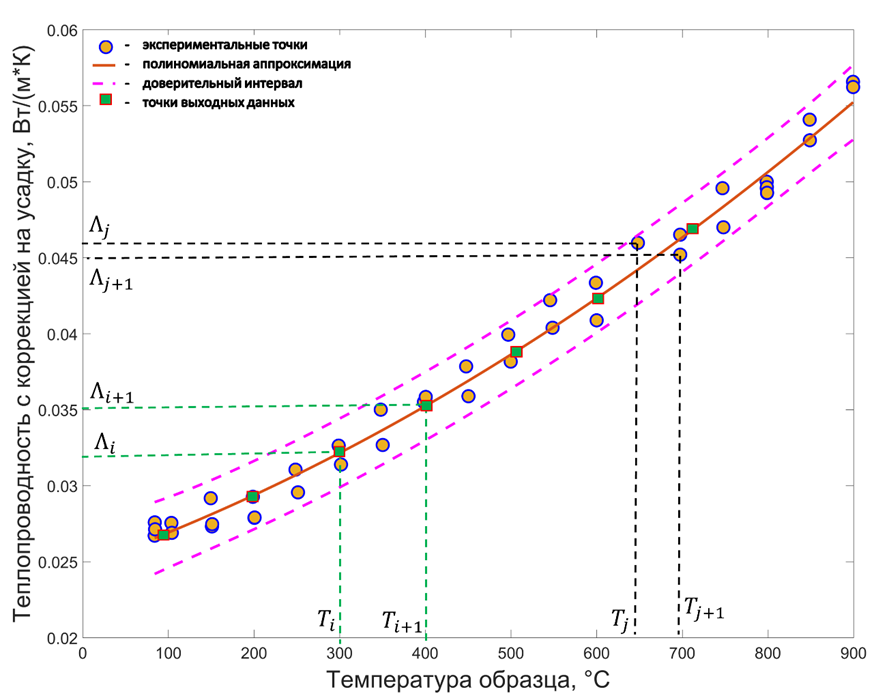
</p>


У нас есть некоторый разброс точек, которые в целом ложаться на одну кривую, но эти точки имеют нерегулярное расположение по обеим осям. Хочется получить результат на регулярное сетке, а также оценить погрешность этих данных.

#### Математика для оценки погрешности.

Вектор невязки:


$$\vec{e} =\vec{b} -AA^{\dagger} \vec{b} =[I-AA^{\dagger} ]\vec{b}$$

( $[I-AA^{\dagger} ]$ \- оператор построения вектора, ортогонального векторному пространству столбцов матрицы $A$ )


Качество аппроксимаци, тут применяется R\- параметр:


$$R=1-(\frac{||\vec{e} ||}{||\vec{b} -<\vec{b} >||})^2$$

Напомню определение :


 $Var(\psi )=\mathbb{E}[((\psi -\mathbb{E}(\psi ))^2 ]$ \- вариация,


 $Cov(\psi ,\phi )=\mathbb{E}[(\psi -\mathbb{E}(\psi ))(\phi -\mathbb{E}(\phi ))]$ \- ковариация двух случайных скалярных величин, $\mathbb{E}$ \- математическое ожидание


Для векторной величины, матрица ковариации:


Диагональные элементы матрицы $C_{nn}$ \- коэффициенты вариации ( $n=1...N$ ),  для  $n$ \- го  свойства : $C_{nn} =\frac{\sum_{i=1}^M (x_{ni} -\mu_n )^2 }{M-1}$


Если из диагональных элементов извлечь корень и поделить на количество экспериментов $L$ , то получим стандартное отклонение среднего арифметического.


Элементы матрицы $C$ , стоящие вне диагонали, \-  коэффициенты ковариации   $n$ \- го  и $m$ \- го свойств: $C_{nk} =\frac{\sum_{i=1}^M [(x_{ni} -\mu_n )(x_{ki} -\mu_k )]}{M-1}$ ( $n,k=1...N,n\not= k$ )


Матрица ковариации вектора параметров $\vec{a}$ :


$$Cov(\vec{a} )=(A^T A)^{-1} \sigma$$

$$\sigma =||\vec{e} ||^2 ={\vec{e} }^T \vec{e} /(n-m)=(\vec{b} -AA^{\dagger} \vec{b} )^T (\vec{b} -AA^{\dagger} \vec{b} )/(n-m)$$

(интересно, что  ${\vec{e} }^T \vec{e} ={\vec{b} }^T (I-AA^{\dagger} )^T (I-AA^{\dagger} )\vec{b} ={\vec{b} }^T [I-A^{{\dagger}^T } A^T -AA^{\dagger} +A^{{\dagger}^T } A^T AA^{\dagger} ]\vec{b} ={\vec{b} }^T [I-AA^{\dagger} ]\vec{b} ={\vec{b} }^T \vec{e}$ \- скалярное произведение вектора $\vec{b}$ на вектор $\vec{e}$ , что логично, так как $\vec{b} =\vec{p} +\vec{e}$ , но при этом $\vec{p}$ ортогонален вектору  $\vec{e}$ )


 $n$ \- число точек, $m$ \- число коэффициентов полинома, $n-m$ \- число степеней свободы, это размерность нуль\-пространства матрицы $A^T$ \- пространства ошибки!


Если $A=QR$ \- qr \- разложение матрицы, то


$$Cov(\vec{a} )=(A^T A)^{-1} \sigma =(R^T Q^T QR)^{-1} \sigma =(R^T R)^{-1} \sigma$$

 $A_{interp}$ \- новая матрица, построенная на другой сетке, для которой нам надо оценить доверительный интервал


 ${\vec{b} }_{interp} =A_{interp} A^{\dagger} \vec{b} =A_{interp} \vec{a}$ ( $\vec{a}$ \- вектор коэффициентов полинома, который определен при решении задачи линейной оптимизации на сетке экспериментальных данных)


 $Cov({\vec{b} }_{interp} )=A_{interp} Cov(\vec{a} )A_{interp}^T$ \- матрица ковариации рассчитанных через нашу аппроксимацию значений на нужной нам сетке координат (эта формула следует из общего правила расчета ковариации случаной величины, являющейся линейной комбинацией)


Диагональные элементы этой матрицы \- коэффициенты вариации (квадратичные отклонения для рассчитанных значений).


$${\vec{b} }_{interp} \pm St\cdot \sqrt{diag[Cov({\vec{b} }_{interp} )]}$$

 $St$ \- коэффициент Стьюдента для числа испытаний N



In [34]:
% пытаемся тоже самое посчитать вручную
A=rand(10,3);

diag(inv(A'*A))

ans = 3x1    
1.2633
    0.6669
1.4895

In [35]:

[Q,R]=qr(A,0);
sum(inv(R).^2,2)

ans = 3x1    
1.2633
    0.6669
1.4895


Приведенные выше формулы являюстя универсальными, дальше рассмотрим их применение в матлаб на примере встроенной функции для полиномиальной аппроксимации polyfit \- polyval\-polyconf

#### Полиномиальный фиттинг в матлаб:


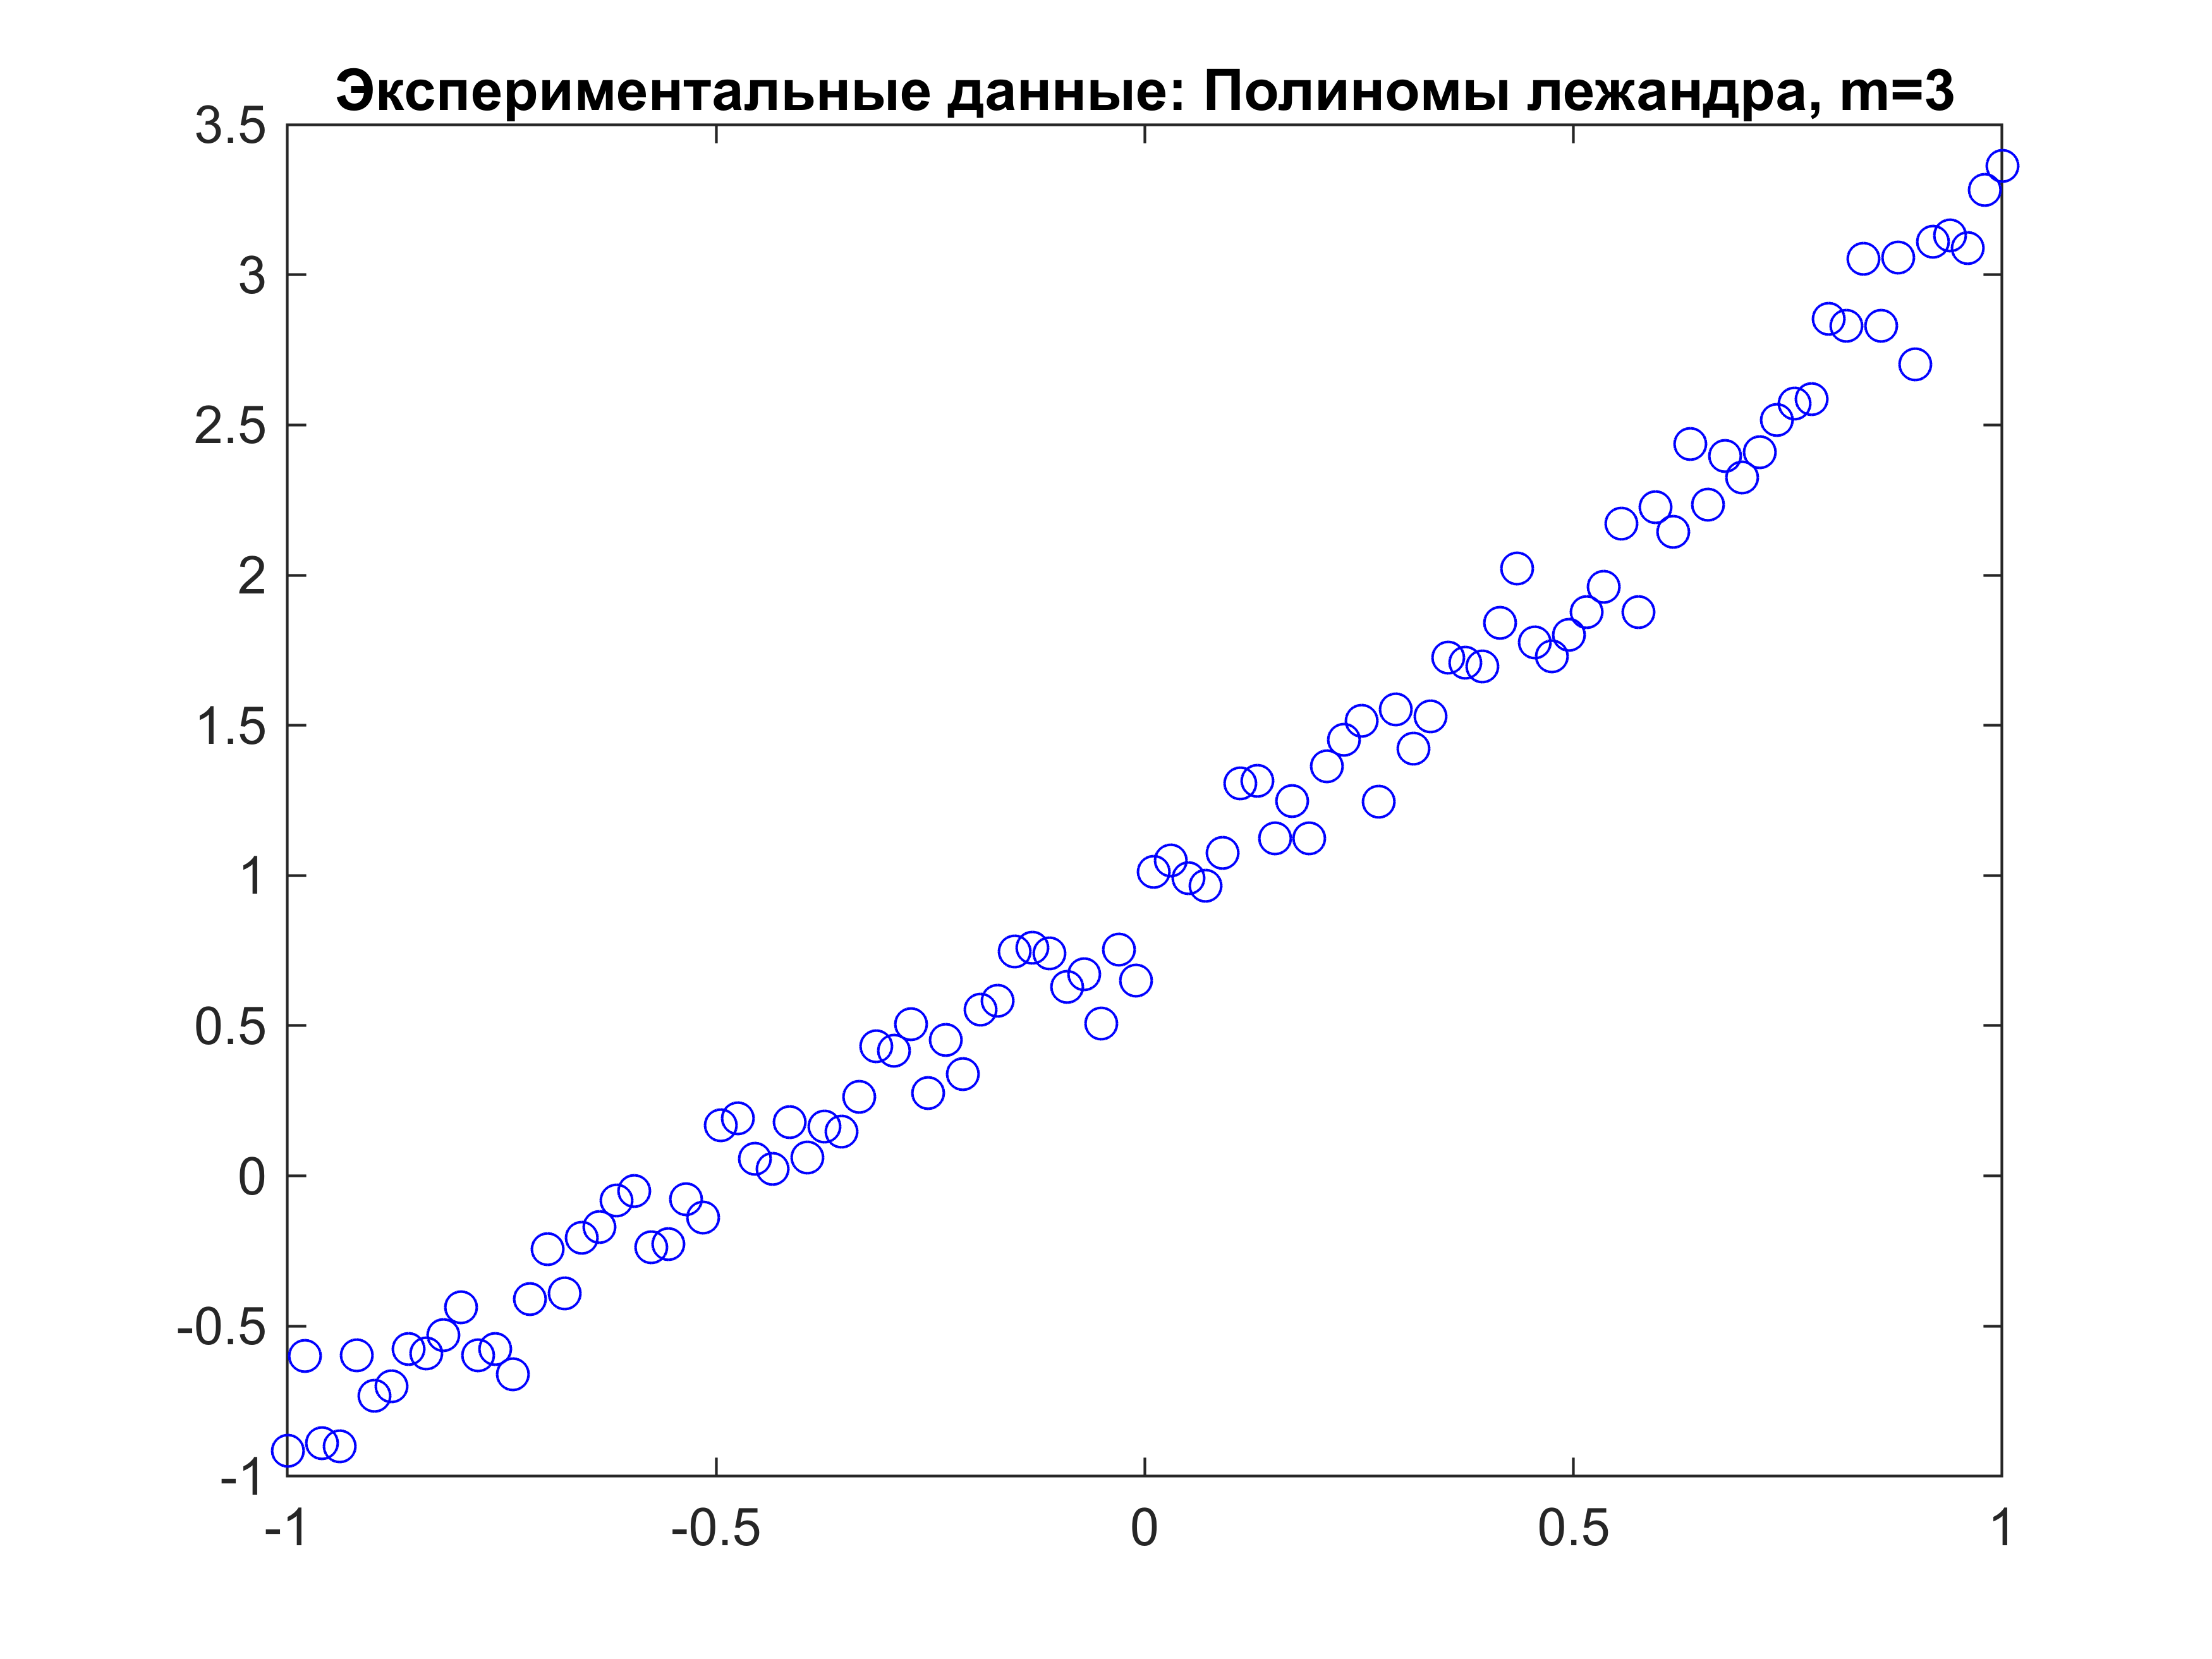

In [36]:
% блок генерации исходных данных скопирован с того, что было раньше
clearvars
% параметры экспериментальных данных
N=100; % число точек измерения
t = transpose(linspace(-1,1,N)); % независисмые переменные
type_experiment = "legP"; % тип реальнйо функции
P = 3; % степень полинома
a1=1;
a2=1.992;
a3=0.256;
a4=0.0218;
a5=-0.55829;
e = 12.91; % амплитуда шумов
a_real = [a1;a2;a3;a4;a5];
% заполняем массив "экспериментальных" данных
y = 0;
Pfun = producing_function(type_experiment,t);
for ii = 1:P
    y = y + a_real(ii)*Pfun(ii);
end
y = y + e*mean(y)*randn(size(y))/100;
ax = get_next_ax();
plot(ax,t,y,"ob");
title(ax,"Экспериментальные данные: "+ rus(type_experiment) + ", m=" + P)


Для фитинга полиномами стандартного базиса используется функция polyfit


\[p,STD\]= polyfit(t,y,P) \- функция для решения задачи фитинга полиномами стандартного базиса


Входные ургументы:


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; x,y \- экспериментальные точки


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; P \- степень полинома (начиная с нуля)


Выходные аргументы:


&nbsp;&nbsp;&nbsp;&nbsp; p \- вектор коэффициентов в порядке убывания степени полинома (не так как в самодельно версии)


&nbsp;&nbsp;&nbsp;&nbsp; STD \- структура, которая хранит в себе данные а качестве аппроксимации и данные для расчета погрешности             аппроксимации)


\[y\_int,delta\_y\]= polyval(x,p,STD) \- функция для решения задачи фитинга полиномами стандартного базиса


входные аргументы


&nbsp;&nbsp;&nbsp;&nbsp; x \- точки, в которых нужна интерполяция


&nbsp;&nbsp;&nbsp;&nbsp; p \- коэффициенты полинома


&nbsp;&nbsp;&nbsp;&nbsp; STD \- структура, возвращаемая polyfit (см. предыдущие обозначения)


выходные аргументы


&nbsp;&nbsp;&nbsp;&nbsp; y\_int \- рещультаты расчета полинома в точках x


&nbsp;&nbsp;&nbsp;&nbsp; delta\_y \- стандартное отклонение от среденего (чтобы учесть вероятность надо домножить на коэффцииент стьюдента)


Также есть вариант, который сразу расчитывает доверительный интервал под заданную вероятность


\[yfitExtended,deltaExtended\] = polyconf(pp,t,STD,'alpha',0.05); % позволяет сразу посчитать доверительный интервал, среди входных аргуметов alpha \- 1 \- p, где p \- доверительная вероятность.


In [37]:
[pp,STD] = polyfit(t,y,P) % функция для фиттинга стандартным базисом полиномов

pp = 1x4    
    0.1840    0.3306    1.9045    0.8813
STD = struct with fields:
           R: [4x4 double]
          df: 96
       normr: 1.1510
    rsquared: 0.9906

In [38]:
V = vandermatrix(t,P+1,"stand") % считаем Вандерматрицу по самодельному способу

V = 100x4    
1.0000   -1.0000    1.0000   -1.0000
2. 0000   -0.9798    0.9600   -0.9406
3. 0000   -0.9596    0.9208   -0.8836
4. 0000   -0.9394    0.8825   -0.8290
5. 0000   -0.9192    0.8449   -0.7766
6. 0000   -0.8990    0.8082   -0.7265
7. 0000   -0.8788    0.7723   -0.6787
8. 0000   -0.8586    0.7372   -0.6329
9. 0000   -0.8384    0.7029   -0.5893
10. 0000   -0.8182    0.6694   -0.5477

In [39]:
[Q,R] = qr(V,0) % делаем ее qr факторизацию

Q = 100x4    
   -0.1000   -0.1715   -0.2170   -0.2492
   -0.1000   -0.1680   -0.2038   -0.2190
   -0.1000   -0.1646   -0.1910   -0.1903
   -0.1000   -0.1611   -0.1783   -0.1632
   -0.1000   -0.1576   -0.1660   -0.1375
   -0.1000   -0.1542   -0.1539   -0.1132
   -0.1000   -0.1507   -0.1421   -0.0904
   -0.1000   -0.1472   -0.1306   -0.0690
   -0.1000   -0.1438   -0.1193   -0.0489
   -0.1000   -0.1403   -0.1083   -0.0302
R = 4x4    
  -10.0000   -0.0000   -3.4007         0
         0    5.8315    0.0000    3.5691
         0         0   -3.0412   -0.0000
         0         0         0    1.5570

In [40]:
STD_R = STD.R % содержит матрицу R для расчета матрицы ковариации

STD_R = 4x4    
   -0.0000   -3.4007    0.0000  -10.0000
    3.5691    0.0000    5.8315         0
    0.0000   -3.0412         0         0
1.5570         0         0         0

In [41]:
[y_fit,delta] = polyval(pp,t,STD) % если в качестве дополнительного аргумента передать в функцию polyval структуру STD, то она вернет коэффициенты вариации дял каждой точки

y_fit = 100x1    
   -0.8766
   -0.8405
   -0.8044
   -0.7686
   -0.7329
   -0.6974
   -0.6619
   -0.6267
   -0.5915
   -0.5564
delta = 100x1    
    0.1259
    0.1247
    0.1237
    0.1229
    0.1222
    0.1215
    0.1210
    0.1206
    0.1202
    0.1199


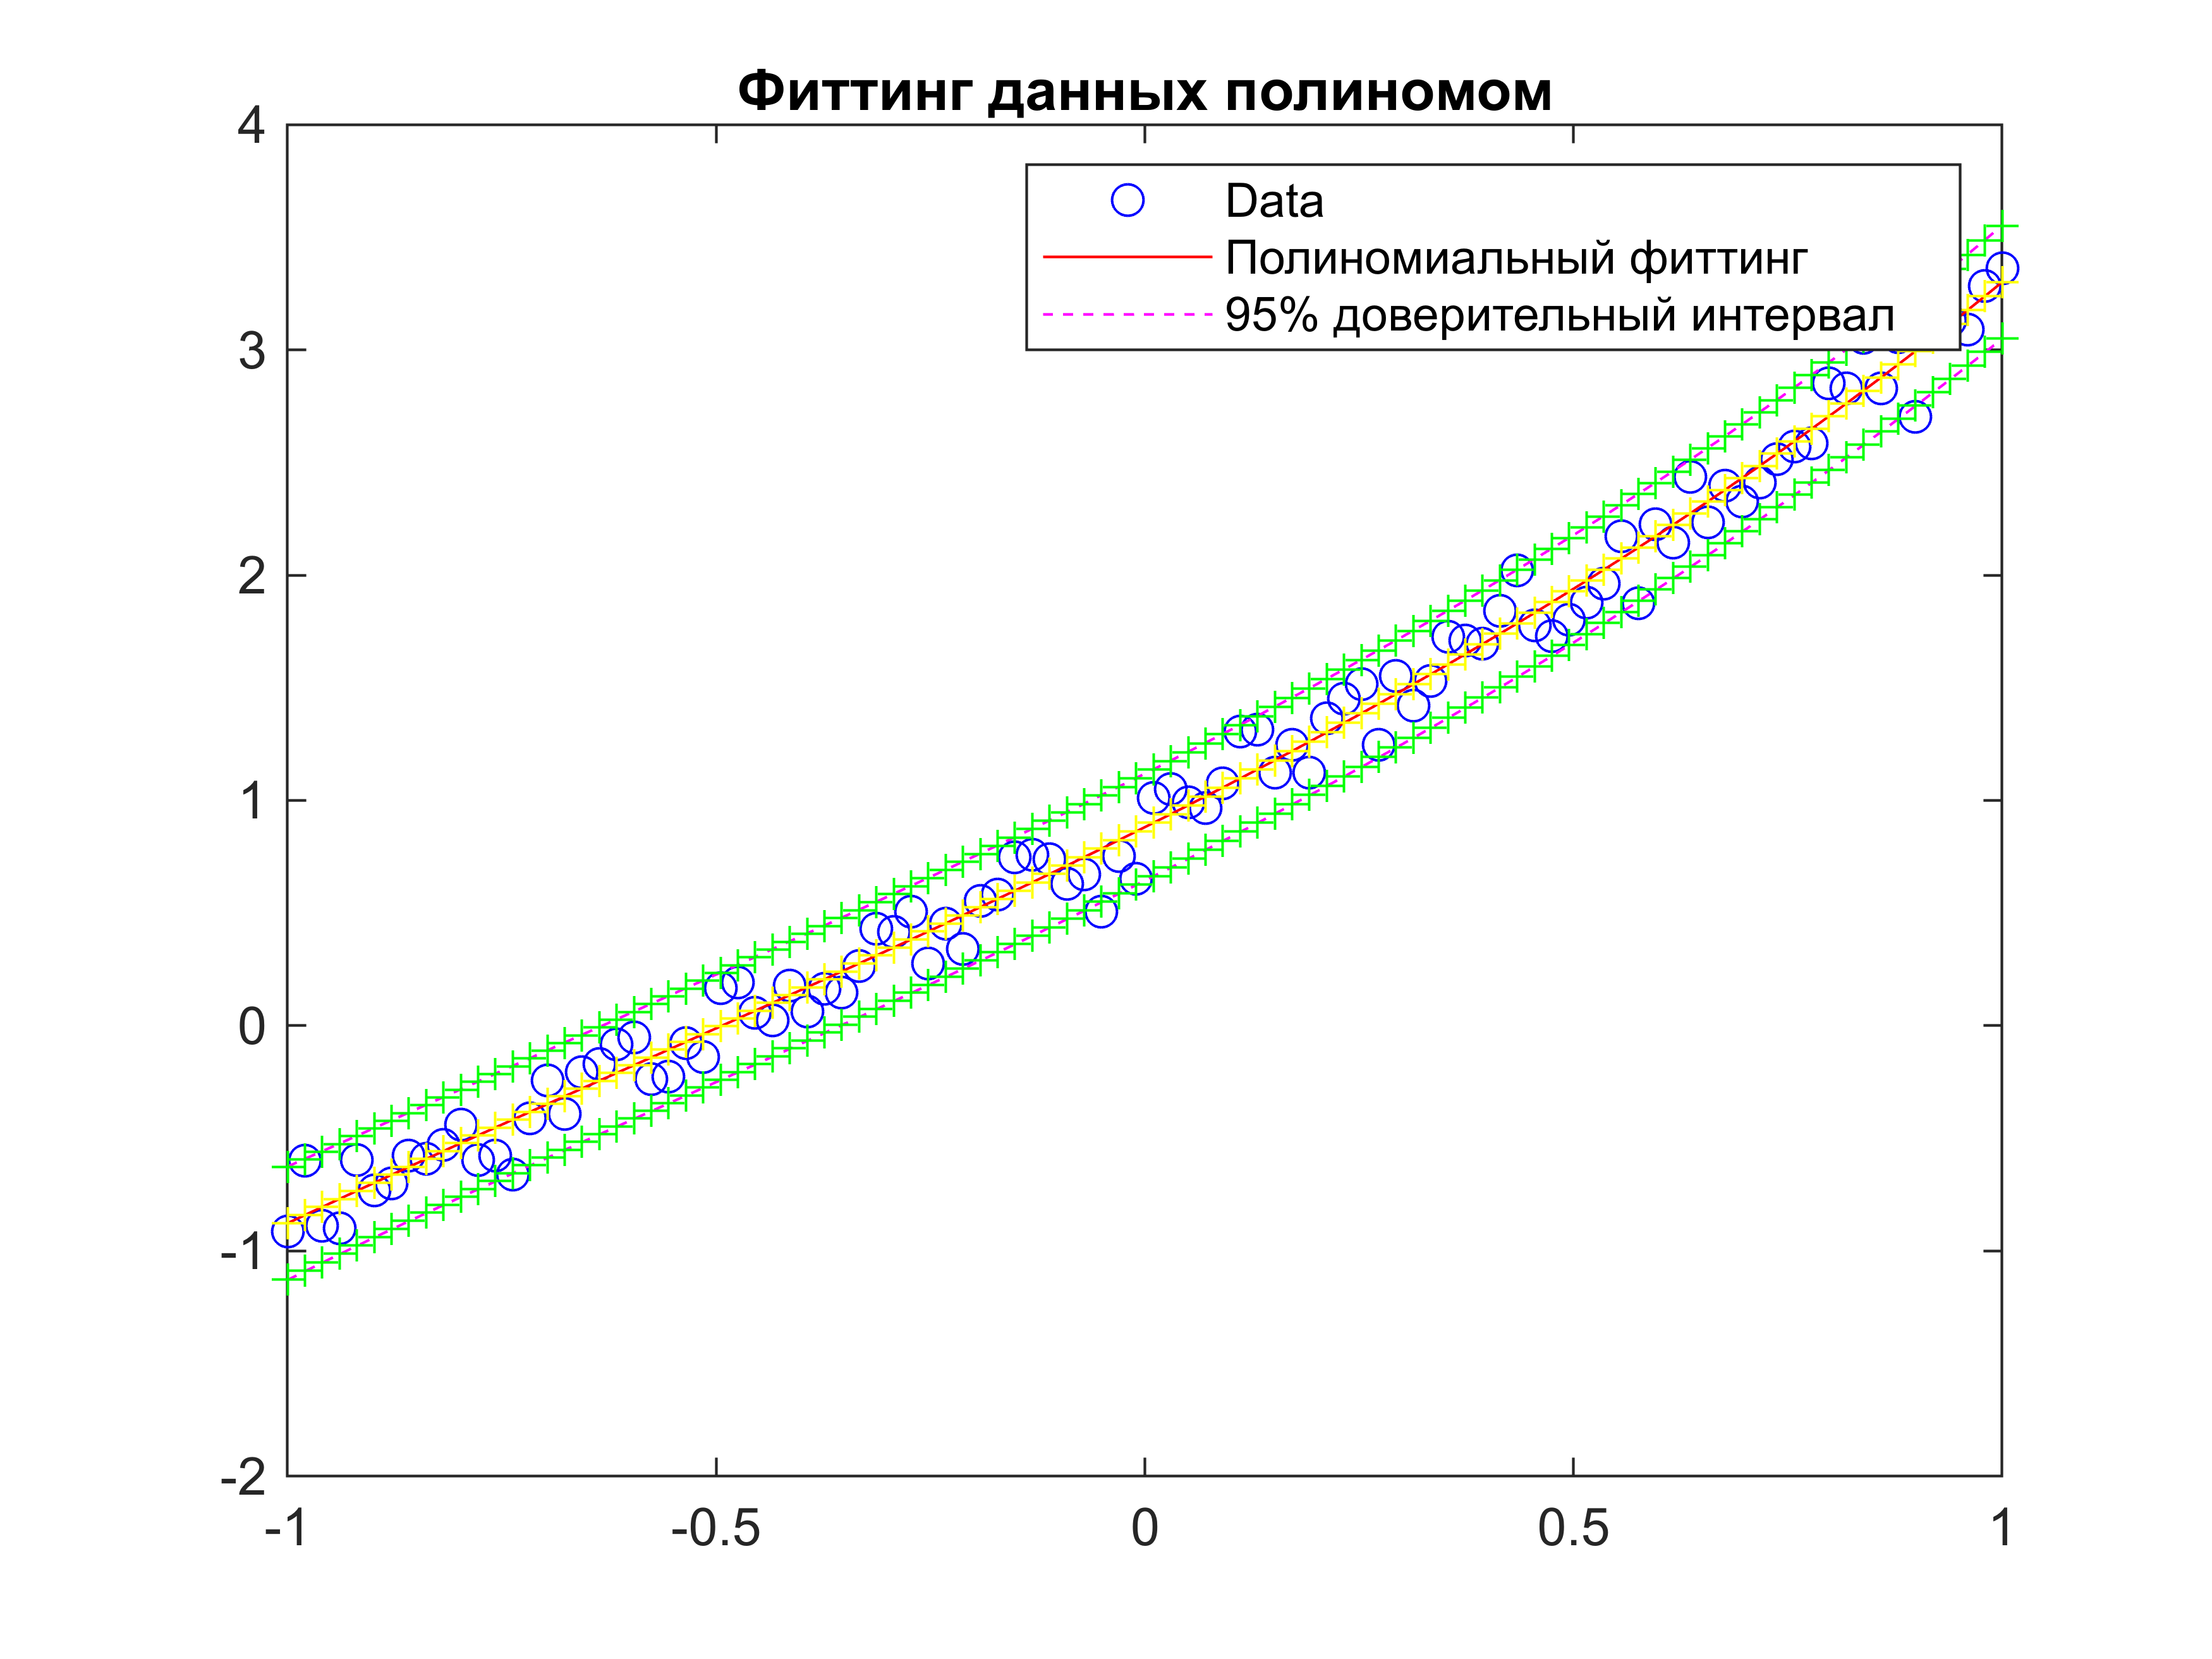

In [42]:
[yfitExtended,deltaExtended] = polyconf(pp,t,STD,'alpha',0.05); % позволяет сразу посчитать доверительный интервал
ax = get_next_ax();
plot(ax,t,y,'bo')
hold(ax, "on")
plot(ax,t,y_fit,'r-')
plot(ax,t,y_fit+2*delta,'m--',t,y_fit-2*delta,'m--')

plot(ax,t,yfitExtended,'+y')
plot(ax,t,yfitExtended+deltaExtended,'g+',t,y_fit-deltaExtended,'g+')
title('Фиттинг данных полиномом')
legend('Data','Полиномиальный фиттинг','95% доверительный интервал')
hold(ax, "off")

In [43]:
mean(deltaExtended./delta)

ans = 1.9850


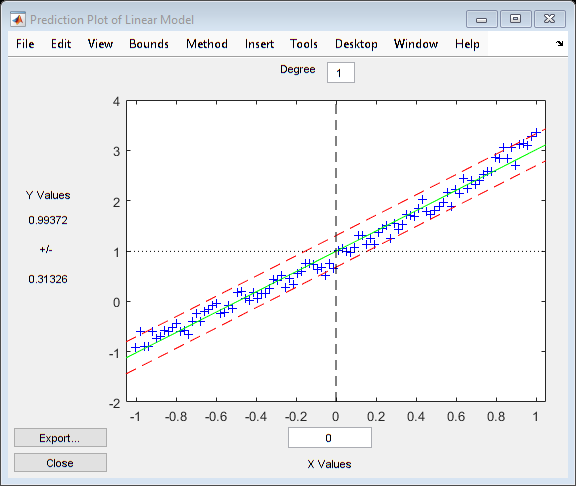

In [44]:
polytool(t,y) % встроенная графиечская обертка для полиномиального фитинга

### Выводы по семинару 7
1.  Задача оптимизации \- найти параметры, при которых модель минимизирует расхождения между ее предсказаниями и результатами измерений. Модель зависит как от переменных оптимизации, так и от независимых переменных (предикторов)
2. Линейная оптимизация (регрессия) \- случай, когда модель зависит от параметров линейно, то есть ее можно представит в виде $A\vec{a}$ , где $\vec{a}$ \- вектор параметров, а $A$ \- матрица, зависящая только от независимых переменных.
3. Примеры линейной оптимизации: полиномиальный фитинг, матрица $A$ \- матрица Вандермонда, которая, например, для стандартного базиса имеет вид: $V=[{\vec{t} }^0 ,...,{\vec{t} }^i ,....,{\vec{t} }^P ]$ , где $\vec{t}$ \- вектор независимых переменных (верхний индекс \- возведение в степень каждого элемента вектора).
4. Если минимизируется квадрат модуля отклонения модели от наблюдаемых данных, то это задача наименьших квадратов
5. С точки зрения линейной алгебры, задача наименьших квадратов состоит в том, чтобы найти такой линейный оператор $A^{\dagger}$ , который при его действии на некоторый произвольный вектор $\vec{b}$ переводит его в пространство строк матрицы $A$ , если  вектор $\vec{b}$ принадлежит пространству столбцов матрицы $A$ и в нулевой вектор, если он принадлежит пространству ортогональному пространству столбцов матрицы $A$ (нуль\-пространство столбцов матрицы $A^T$ ).
6. Таким образом, оператор  $AA^{\dagger}$ является оператором проецирования произвольного вектора на векторное пространство столбцов матрицы,  при его действии  вектор $\vec{b}$ он переводит его в вектор $\vec{p}$ , принадлежащий пространству столбцов матрицы $A$ , а вектор $\vec{e} =\vec{b} -\vec{p}$ \- является ошибкой аппроксимации.
7. Для полиномиальной аппроксимации, при увеличении степени полинома матрица $V$ становится близкой к сингулярной (что видно из спектра ее сингулярных значений), если требуется большой порядок полинома, ортогональные полиномы Лежандра являются предпочтительными
8. Для полиномиально аппроксимации стандартным базисом можно пользоваться функцией

\[pp,STD\] = polyfit(t,b,P\-1) \- a \- вектор коэффициентов полинома, t \- координаты, b  \- вектор данных для фитинга, P \- количество полиномиальных коэффициентов, STD\- структура, хранящая данные нужные для оценки погрешности, a \- вектор коэффициентов полинома в порядке убывания степени


\[y,delta\] = polyval(pp,t\_new,STD)  \- функция для расчета полинома, y \- результат расчета, delta \- ошибка аппроксимации ( *y* ± delta это примерно 68%\-ный доверительный интервал,  *y* ± 2delta) \-   95% ный.)


\[y,delta\] = polyconf(pp,t\_new,STD,'alpha',ALPHA)  \- функция для расчета полинома, y \- результат расчета, delta \- ошибка аппроксимации для заданной доверительной вероятности, ALPHA = 0.05 соотвествует доверительной вероятности 95%.


ЛИТЕРАТУРА


1. N.Draper, H.Smith . Applied regression analysis. Third edition. Wiley Series in Probability and Statistics.


2.  Gilbert Strang \- Introduction to Linear Algebra (2016, Wellesley\-Cambridge Press)


3. John D'Errico (2025). Optimization Tips and Tricks (https://www.mathworks.com/matlabcentral/fileexchange/8553\-optimization\-tips\-and\-tricks), MATLAB Central File Exchange. Retrieved January 30, 2025.

#### Функции

In [45]:
function rus_name = rus(type)
    possible_types =  ["stand" "legA" "trig" "legP" "custom"];
    possible_rus_names = ["Стандартный базис" "Присоединенные полиномы Лежандра" "Тригонометрический базис" "Полиномы лежандра" "Кастомный"];
    flag = possible_types==type;
    if any(flag)
        rus_name = possible_rus_names(flag);
    else
        rus_name = type;
    end

end
function [V,s] = vandermatrix(t,P,type,polyprod_function)
arguments
    t double
    P (1,1) double {mustBeInteger,mustBePositive} = 2
    type (1,1) string {mustBeMember(type,["stand" "legA" "trig" "legP" "custom"])} = "stand"
    polyprod_function =[]
end
% создаем матрицу Вандермонда
% type - тип полинома (стандартный базис, полиномы лежандра,
% тригонометрические полиномы)
    t = t(:);
    N = numel(t);
    V = zeros(N,P);
    if ~(type=="custom")
        [Pfun,s] = producing_function(type,t); % возвращаем производящую функцию для колонки матрицы вандермонда
    else
        assert(~isempty(polyprod_function)||~isa(polyprod_function,"function_handle"),"Если выбрана кастомная производящая функция, то нужно ее предоставить")
        s = normalize(t);
        Pfun = @(i)polyprod_function(i,s.x);
    end
    for jj = P:-1:1
        V(:,jj) = Pfun(jj);
    end
end
function dist= make_dist(type,varargin)
    mu=0;sig2=1;
    if numel(varargin)>0
        mu=varargin{1};
        if numel(varargin)>1
            sig2 = varargin{2}.^2;
        end
    end
    switch type
        case "Normal"
            dist = @(N) mu + sig2*randn([N 1]);
        case "Uniform"
            dist  = @(N)   sqrt(sig2)*(rand([N 1])  -0.5)+ mu;
        case "Weibull"
            dist  = @(N) wblrnd(mu,sqrt(sig2),N,1);
    end

end
function norm_struct = normalize2(t)
% функция возвращает стурктуру, в которой хранятся данные для нормировки
    if ~issorted(t)
        t = sort(t,"ascend");
    end
    tmin = t(1);
    tmax = t(end);
    x = 2.0*((t - tmin) / (tmax - tmin))- 1;
    norm_struct = struct("tmin",tmin,"tmax",tmax,"x",x); %t,(max(t) - min(t))
end
function t = denormalize2(s)
    t = 0.5*(s.x + 1.0)*(s.tmax - s.tmin) + s.tmin;
end
function Pn = leg_polyA(i,t) % производящая функция для присоединенных полиномов Лежандра
    persistent P
    persistent tleg
    leg_type = 'norm';
    if isempty(tleg)||isempty(P)||(~isequal(t,tleg))
        P = transpose(legendre(i-1,t,leg_type)); % встроенная функция по сути возвращает уже матрицу Вандермонда
        tleg = t;
    end
    if i<=size(P,2)
        Pn = P(:,i);
        return
    end
    P = transpose(legendre(i,t,leg_type));
    tleg = t;
    Pn = P(:,end);
end
function Pn = trig_poly(i,t) % производящая функция для тригонометрических полиномов
    if i==1
        Pn  = ones(size(t));
        return
    end
    if mod(i,2)==0
        Pn = cos(i*t*pi);
    else
        Pn = sin(i*t*pi);
    end
end
function [P,s] = producing_function(type,t)
% функция возвращает производящую функцию для полинома
    s = normalize2(t);
    switch type
        case "stand" % стандартный базис полинома
          P = @(i) s.x.^(i-1);
        case "legA" % присоединенные полиномы Лежандра
          P = @(i) leg_polyA(i,s.x);
        case "legP" % полиномы Лежандра
          P = @(i) legendreP(i-1,s.x) ; % стандартная фукнция для полиномов лежандра
        case "trig" % тригонометрический базис
          P = @(i) trig_poly(i,s.x);

    end

end
function [new_ax,fig_handle] = get_next_ax(index, axes_name_value_pairs)
% функция, которая возвращает новые оси на новой фигуре (нужна чтобы
% кратинки в ливскрипте нормально строились)
    arguments
        index = []
        axes_name_value_pairs cell = {}
    end
    persistent N;
    if isempty(index)
        if isempty(N)
            N=1;
        else
            N  = N+1;
        end
        fig_handle = figure(N);
        clf(fig_handle);
        new_ax = axes(fig_handle,axes_name_value_pairs{:});
        %disp("fig"+ N)
    else
        fig_handle = figure(index);
        clf(fig_handle);
        new_ax = axes(fig_handle,axes_name_value_pairs{:});
    end
end
function ax = get_named_ax(title_string)
    ax = get_next_ax();
    title(title_string);
end
function ax = draw_vector(ax,ttl,names,type,varargin)
% функция строит двух- и трех-мерные вектора, а также рассеянные данные из
% матрицы
% ax - оси (если пустые, то создаются новые)
% ttl - заголовок картинки
% names - имена векторов
% type:
%       "vector" - аргументы, которые передаются после интерпретируются
%                   как отдельные вектора
%       "point"  - в этом случае передается матрица в качестве аргумента и
%       столбцы матрицы строятся при помощи функций scatter и scatter3 d
%       в зависимости от размерности массива
    arguments
        ax =[]
        ttl string =strings(0,1)
        names string =strings(0,1)
        type string {mustBeMember(type,["vector" "point"])}="vector"
    end
    arguments (Repeating)
        varargin double
    end
    was_empty = isempty(ax); % это признак того, что все строится на новых осях
    if was_empty
        ax = get_next_ax();
    else
        hold(ax,"on");
        % if ~isempty(ax.Legend)
        %     leg_before = ax.Legend.String;
        % else
        %     leg_before = strings(0,1);
        % end
    end

    if strcmp(type,"vector")
        is_3D = numel(varargin{1})==3;
            if is_3D
                [x,y,z]  = make_xy(varargin{1});
                plot3(ax,x,y,z,'LineWidth',2,'Marker','o');
                hold on
                for iii = 2:numel(varargin)
                        [x,y,z] = make_xy(varargin{iii});
                        plot3(ax,x,y,z,'LineWidth',2,'Marker','o');
                end
                grid on
                hold off
            else
                [x,y]  = make_xy(varargin{1});
                plot(ax,x,y,'LineWidth',2,'Marker','o');
                hold on
                for iii = 2:numel(varargin)
                        [x,y]  = make_xy(varargin{iii});
                        plot(ax,x,y,'LineWidth',2,'Marker','o');
                end
                grid on
                hold off
            end
            if isempty(names)||(numel(names)~=numel(varargin))
                legend(ax,string(1:numel(varargin)));

            else
                % if ~was_empty
                %      names= [names(:);leg_before(:)];
                % end
                legend(ax,names);
            end
            xlim(ax,[-1 1]);
            ylim(ax,[-1 1]);
            if ~isempty(ttl)
                title(ax,ttl);
            end
    else
        %data_number = numel(varargin); % число массивов данных
        is_3D = numel(varargin)==3;
        data = varargin{1};
        if size(data,2)>1
            data = transpose(data);
            is_transpose = true;
        else
            is_transpose = false;
        end
        if ~is_transpose
            for iii = 2:numel(varargin)
                data = [data,varargin{iii}];
            end
        else
            for iii = 2:numel(varargin)
                data = [data,transpose(varargin{iii})];
            end
        end

        if is_3D
            scatter3(ax,data(:,1),data(:,2),data(:,3));
        else
            scatter(ax,data(:,1),data(:,2));
        end

    end
    if ~was_empty
            hold(ax,"off");
    end
end
function [x,y,z]  = make_xy(col)
% добавляет к координатам вектора нули так, чтобы при помощи функции plot
% строилась линия
    switch numel(col)
        case 1
            x = [col(1)];
            y = 0;
            z = 0;
        case 2
            x = [0 col(1)];
            y = [0 col(2)];
            z = zeros(1,2);
        case 3
            x = [0 col(1)];
            y = [0 col(2)];
            z = [0 col(3)];
    end
end
% function [bpar,bper,ang,P] = projection_matrix(A,b)
% % функция считает угол между вектором и пространством столбцов матрицы A
%     for ii =1:size(A,2)
%         A(:,ii) = A(:,ii)/norm(A(:,ii));
%     end
%     beta = A*transpose(A)*b;
%     beta = beta/norm(beta); % нормируем вектор beta
%     Pbeta = beta*transpose(beta); % оператор проектирования вектора на
%     bpar = Pbeta*b;
%     bper = b-bpar;
%     ang = rad2deg(acos(norm(bpar)/norm(b)));
% end